<div align = "center"><h1> Coursera Capstone Project - Battle of the Neighbourhoods</h1> </div>



<h3> Project By: Jothika Sundaram <br>
    
Date: June 02, 2020 </h3>

<div class="alert alert-block alert-danger" style="margin-top: 0px">
    <h2> PLEASE READ:</h2> 
 
<h4>If you are viewing this notebook on my Github, you will notice that many cells and visuals will not render properly. <a href = 'https://nbviewer.jupyter.org/github/Jo-Sundaram/Coursera_Capstone/blob/master/Coursera%20Capstone%20Project%20-%20Battle%20of%20the%20Neighbourhoods.ipynb'>Please click here to view this notebook in a notebook viewer </a> that will render all cells properly, thank you! </h4></div>
    

<h2> Table of Contents <a id = "TOC"></a></h2>

A. <a href = "#Intro">Introduction and Business Problem</a>  
B. <a href = "#Methodology">Data and Methodology</a>    
C. <a href = "#Data">Data Collection and Cleaning</a>    
D. <a href = "#Analysis">Analysis</a>   
E. <a href = "#Results">Results and Discussion</a>    
F. <a href = "#Conclusion">Conclusion</a>    

<h2><a id = "Intro"></a>A. Introduction and Business Problem</h2>

The city of Toronto is one of the major metropoles in Canada. With a population of over 2.93 million, it is the most populous city in Canada known for its iconic skyscrapers, bustling city life and dynamic ethnic diversity. For these reasons, Toronto is also an international centre for business and finance, and is a major economic hub in Canada. 

These factors also encourage entrepreneurs, small business owners and startup companies to open their business in Toronto. This project aims to act as a "startup company guide" to new entrepreneurs. It will provide an analysis on the various business and local venues located across the city, along with local population demographics such as ethnicity and age groups. This information will then give us an idea about **what kinds** of business should open up in **which area** of the city, along with the demographics of the local population that will be targeted.


<h2>B.1 Data </h2><a id = "Methodology"></a> 

To perform this analysis we require the following sets of data:

*  In order to determine the local population demographics, we require the city's **neighbourhood profiles**. This dataset can be obtain from the **[City of Toronto Open Data Portal](https://open.toronto.ca/dataset/neighbourhood-profiles/)**. This dataset includes population distribution and demographics such as age and ethnicity groups. With this we can discover the characteristics of the audiences surrounding the types of venues in each neighbourhood. [(Click here to download the dataset)](https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv)


*  We can easily obtain the **location data** of the city using **[Foursquare API](https://foursquare.com/)**. With this we can analyse the geographical features, such as popular venues and companies in each borough. This will give us an idea of how businesses are spread out in the city which will aid us in finding different locations for potential entrepreneurs to open a venue. 


*   In order to retrieve the information we want from the Foursqaure API, we will need to provide specific locations we want to explore. I will be using a dataset of the different postal code areas in Toronto, along with their respective boroughs and neighbourhoods. This can be obtained by scraping **[this wikipedia page](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)** of postal codes in Toronto.     


* We will need the geographic coordinates of each borough and neighbourhood to feed into our Foursquare API, which will be obtained through python's geocoding API service **[GeoPy](https://geopy.readthedocs.io/en/stable/)**. 

<h2>B.2 Methodology</h2>

1. We will examine the **neighbourhood profiles** of Toronto to get an idea of the demographics in each area. We will then visualize our findings using **choropleth maps** to see the distribution of these different groups.    
          

2. We will collect and clean the data required to feed our **Foursquare API** to get the location data of the different venues across the city. We will visualize these locations on a map.  

   
3. We will do a quantitative analysis on the **most common venues by category** located in each borough and use bar charts to visualize these findings.  


4. We will cluster the neighbourhoods using the **k-means clustering** ML algorithm in order to partition these areas based on the **most common venue type**. These clusters will then be visualized on a map.   
    
    
5. Finally, we will be able to see the distribution of venues across the city along with their local population demographics - this will provide potential locations and target audiences for new entrepreneurs based on their business needs.

<h2><a id = "Data"></a>C. Data Collection and Cleaning</h2> <a id = "CTOP"></a>
<a href = "#TOC">table of contents</a>

<h3>C.1 - <a href = "#C1TOP">Analysing Toronto Census Data</a> <br>
C.2 - <a href = "#C2TOP">Acquiring Foursquare data</a></h3>

### C.1 - In this Section: <a id = "C1TOP"></a>   
1. <a href = "#census">Analysing Ethnic Origins of Residents in Toronto</a>   
2. <a href = "#choro-ethnic">Choropleth Map of Foreign Ethnic Origin Density</a>
3. <a href = "#age">Analysing Age Groups of Residents in Toronto</a>
4. <a href = "#choro-age">Choropleth Map of Different Age Groups</a>

First we need to import all the required libraries:

In [2]:
import pandas as pd
import numpy as np
import json # library to handle JSON files
import requests # library to handle requests
import io
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as cols
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
%matplotlib inline
import seaborn as sns
import math
import folium
from folium import plugins

<h2><a id = 'census'></a> Analysing Ethnic Origins</h2>  
<a href = "#C1TOP">back to section top</a>

The dataset of neighbourhood profiles is fetched from this url and read into a dataframe.

In [3]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
tor_data = pd.read_csv(url)

In [4]:
tor_data.head()

_id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

  City of Toronto Agincourt North Agincourt South-Malvern West  \
0             NaN             129                          128   
1             NaN  No Designation               No Designation   
2       2,731,571          29,113                       23,757   
3       2,615,060          30,279                       21,988   
4           4.50%          -3.90%                        8.00%   

        Alderwood           Annex  ... Willowdale West  \
0              20              95  ...              37   
1  No Designation  No Designation  ...  No Designation   
2          12,054          30,526  ...          16,936   
3          11,904          29,177  ...          15,004   
4           1.30%           4.60%  ...          12.90%   

  Willowridge-Martingrove-Richview  Woburn Woodbine Corridor Woodbine-Lumsden  \
0                                7     137                64               60   
1                   No Designation     NIA    No Designation   No Designation   
2                           22,156  53,485            12,541            7,865   
3                           21,343  53,350            11,703            7,826   
4                            3.80%   0.30%             7.20%            0.50%   

         Wychwood  Yonge-Eglinton  Yonge-St.Clair York University Heights  \
0              94             100              97                      27   
1  No Designation  No Designation  No Designation                     NIA   
2          14,349          11,817          12,528                  27,593   
3          13,986          10,578          11,652                  27,713   
4           2.60%          11.70%           7.50%                  -0.40%   

       Yorkdale-Glen Park  
0                      31  
1  Emerging Neighbourhood  
2                  14,804  
3                  14,687  
4                   0.80%  

[5 rows x 146 columns]

I created a function that will quickly reset the index of a given dataframe, which we will need to use for many of the dataframes we make.

In [5]:
# This function will quickly reset the index of a given dataframe if needed
def reset_index_(dataframe, col_name):
    dataframe.reset_index(inplace = True)
    if len(col_name)==0:
        if 'index' in dataframe:
            dataframe.drop('index',1,inplace= True)
    else:
        dataframe.rename(columns = {'index':col_name},inplace = True)
    if 'level_0' in dataframe:
        dataframe.drop('level_0',1,inplace= True)

In [6]:
tor_data.drop(['_id','Data Source'],1,inplace = True)

Lets focus on the Ethnic Origins of residents in this dataset. 

In [7]:
tor_ethnics = pd.DataFrame(tor_data[tor_data['Category']=='Ethnic origin'])

In [8]:
reset_index_(tor_ethnics,"")

In [9]:
tor_ethnics.head()

Category                     Topic  \
0  Ethnic origin  Ethnic origin population   
1  Ethnic origin  Ethnic origin population   
2  Ethnic origin  Ethnic origin population   
3  Ethnic origin  Ethnic origin population   
4  Ethnic origin  Ethnic origin population   

                                      Characteristic City of Toronto  \
0                                       Guadeloupean               0   
1                                           Scottish         256,250   
2  Total - Ethnic origin for the population in pr...       2,691,665   
3                  North American Aboriginal origins          35,630   
4              First Nations (North American Indian)          27,610   

  Agincourt North Agincourt South-Malvern West Alderwood   Annex  \
0               0                            0         0       0   
1             600                          725     1,720   5,225   
2          28,820                       23,470    12,025  28,635   
3              40                          105       305     475   
4              25                           90       200     345   

  Banbury-Don Mills Bathurst Manor  ... Willowdale West  \
0                 0              0  ...               0   
1             2,835            510  ...             975   
2            26,995         15,580  ...          16,670   
3               230             90  ...             105   
4               175             75  ...              60   

  Willowridge-Martingrove-Richview  Woburn Woodbine Corridor Woodbine-Lumsden  \
0                                0       0                 0                0   
1                            1,720   2,760             2,915            1,485   
2                           22,135  53,015            12,425            7,845   
3                              130     605               425              270   
4                              110     470               355              235   

  Wychwood Yonge-Eglinton Yonge-St.Clair York University Heights  \
0        0              0              0                       0   
1    1,915          2,395          2,665                     725   
2   13,250         11,805         12,295                  27,575   
3      335            140            215                     220   
4      275             90            130                     200   

  Yorkdale-Glen Park  
0                  0  
1                375  
2             14,020  
3                105  
4                 85  

[5 rows x 144 columns]

In [10]:
tor_ethnics['Characteristic'].unique()

array([' Guadeloupean', ' Scottish',
       'Total - Ethnic origin for the population in private households - 25% sample data',
       ' North American Aboriginal origins',
       ' First Nations (North American Indian)', ' Inuit', ' Mtis',
       ' Other North American origins', ' Acadian', ' American',
       ' Canadian', ' New Brunswicker', ' Newfoundlander',
       ' Nova Scotian', ' Ontarian', ' Qubcois', ' Portuguese',
       ' Other North American origins; n.i.e.', ' European origins',
       ' British Isles origins', ' Channel Islander', ' Cornish',
       ' English', ' Irish', ' Manx', ' Welsh',
       ' British Isles origins; n.i.e.', ' French origins', ' Alsatian',
       ' Breton', ' Corsican', ' French',
       ' Western European origins (except French origins)', ' Austrian',
       ' Bavarian', ' Belgian', ' Dutch', ' Flemish', ' Frisian',
       ' German', ' Luxembourger', ' Swiss',
       ' Western European origins; n.i.e.',
       ' Northern European origins (except Br

There are many unique origins, but we want to focus on the ones that come from outside of North America and traditional North American origins.

In [11]:
drop_origins = [ ' Other North American origins', ' Acadian', ' American',
       ' Canadian', ' New Brunswicker', ' Newfoundlander',
       ' Nova Scotian', ' Ontarian', ' Qubcois',
       ' Other North American origins; n.i.e.',
 'Total - Ethnic origin for the population in private households - 25% sample data',' European origins',
       ' British Isles origins', ' Channel Islander', ' Cornish',
       ' English', ' Irish', ' Manx', ' Welsh',
       ' British Isles origins; n.i.e.', ' French origins', ' Alsatian',
       ' Breton', ' Corsican', ' French']

We need to drop these rows from the dataframe. We also need to convert all numerical values to type int.

In [12]:
for index in tor_ethnics.index:
    for origin in drop_origins:
        if tor_ethnics.loc[index,'Characteristic']== origin: # drop all the unwanted ethnic origins from the dataset
            tor_ethnics.drop(index,0,inplace = True)
            break
reset_index_(tor_ethnics,"")

for index in tor_ethnics.index: # convert all numerical values to type int
    for col_name in tor_ethnics.columns[3:]:
        value = tor_ethnics.loc[index,col_name] 
        value = value.replace(',',"")
        tor_ethnics.loc[index,col_name] = int(value)

In [358]:
tor_ethnics.head()


Category                     Topic  \
0  Ethnic origin  Ethnic origin population   
1  Ethnic origin  Ethnic origin population   
2  Ethnic origin  Ethnic origin population   
3  Ethnic origin  Ethnic origin population   
4  Ethnic origin  Ethnic origin population   

                           Characteristic City of Toronto Agincourt North  \
0                            Guadeloupean               0               0   
1                                Scottish          256250             600   
2       North American Aboriginal origins           35630              40   
3   First Nations (North American Indian)           27610              25   
4                                   Inuit             515               0   

  Agincourt South-Malvern West Alderwood Annex Banbury-Don Mills  \
0                            0         0     0                 0   
1                          725      1720  5225              2835   
2                          105       305   475               230   
3                           90       200   345               175   
4                            0        15    20                10   

  Bathurst Manor  ... Willowridge-Martingrove-Richview Woburn  \
0              0  ...                                0      0   
1            510  ...                             1720   2760   
2             90  ...                              130    605   
3             75  ...                              110    470   
4              0  ...                                0     25   

  Woodbine Corridor Woodbine-Lumsden Wychwood Yonge-Eglinton Yonge-St.Clair  \
0                 0                0        0              0              0   
1              2915             1485     1915           2395           2665   
2               425              270      335            140            215   
3               355              235      275             90            130   
4                 0                0       10              0              0   

  York University Heights Yorkdale-Glen Park   Total  
0                       0                  0       0  
1                     725                375  512145  
2                     220                105   71170  
3                     200                 85   55080  
4                       0                  0    1035  

[5 rows x 145 columns]

In [14]:
columns = tor_ethnics.columns[3:-1]
tor_ethnics['Total'] = tor_ethnics[columns].sum(axis=1).astype(int) # add a Total column at the end

Now we've added a Total columns that holds the total number of residents from each ethnic origin.

In [15]:
tor_ethnics.head()

Category                     Topic  \
0  Ethnic origin  Ethnic origin population   
1  Ethnic origin  Ethnic origin population   
2  Ethnic origin  Ethnic origin population   
3  Ethnic origin  Ethnic origin population   
4  Ethnic origin  Ethnic origin population   

                           Characteristic City of Toronto Agincourt North  \
0                            Guadeloupean               0               0   
1                                Scottish          256250             600   
2       North American Aboriginal origins           35630              40   
3   First Nations (North American Indian)           27610              25   
4                                   Inuit             515               0   

  Agincourt South-Malvern West Alderwood Annex Banbury-Don Mills  \
0                            0         0     0                 0   
1                          725      1720  5225              2835   
2                          105       305   475               230   
3                           90       200   345               175   
4                            0        15    20                10   

  Bathurst Manor  ... Willowridge-Martingrove-Richview Woburn  \
0              0  ...                                0      0   
1            510  ...                             1720   2760   
2             90  ...                              130    605   
3             75  ...                              110    470   
4              0  ...                                0     25   

  Woodbine Corridor Woodbine-Lumsden Wychwood Yonge-Eglinton Yonge-St.Clair  \
0                 0                0        0              0              0   
1              2915             1485     1915           2395           2665   
2               425              270      335            140            215   
3               355              235      275             90            130   
4                 0                0       10              0              0   

  York University Heights Yorkdale-Glen Park   Total  
0                       0                  0       0  
1                     725                375  512145  
2                     220                105   71170  
3                     200                 85   55080  
4                       0                  0    1035  

[5 rows x 145 columns]

Lets create a dataframe that holds the total number of ethnic residents in each neighbourhood.

In [16]:
local_ethnics = pd.DataFrame(tor_ethnics.drop(['Category','Topic','Characteristic','Total'],1))

In [17]:
local_ethnics = local_ethnics.T

In [18]:
local_ethnics['Total'] = local_ethnics.sum(axis = 1).astype(int)

In [19]:
reset_index_(local_ethnics,'Neighbourhood')

In [20]:
local_ethnics.drop(0,inplace = True)

In [21]:
local_ethnics.sort_values('Total',ascending = False,inplace = True)

In [22]:
local_ethnics.head()

Neighbourhood  0     1    2    3   4    5     6  \
123  Waterfront Communities-The Island  0  8355  965  665   0  305  1385   
130                    Willowdale East  0  1900  205  165  10   45   470   
133                             Woburn  0  2760  605  470  25  110   800   
106                              Rouge  0  2485  285  185  10   90   865   
74                             Malvern  0  1360  335  270  30   65   590   

        7    8  ...  245  246  247 248 249 250 251 252 253   Total  
123  6925  570  ...   70  235  210  40   0   0   0   0   0  165680  
130  1795  200  ...   45   55   40  10   0   0   0   0   0  146025  
133  1505  130  ...  215   80   10   0  80  65   0  10   0  144360  
106  1590   45  ...  125   50   30  10   0  10   0   0   0  129445  
74    785   30  ...  120   55   20  15  15  15   0  10   0  127005  

[5 rows x 256 columns]

<h2><a id = "choro-ethnic"></a> Choropleth Map of Foreign Ethnic Origin Density</h2>  
<a href = "#C1TOP">back to section top</a>

We need to download a geojson file of Toronto to use in our choropleth map.    
**NOTE:** if you download the json file yourself, you will need to open the file and remove `var neighbourhoods =`
on the first line of the file.

In [23]:
import wget
# download toronto geojson file
json_url = r'https://raw.githubusercontent.com/adamw523/toronto-geojson/master/neighbourhoods.js'
# json_file = wget.download(json_url)  # uncomment to download
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [24]:
json_file = r'neighbourhoods.js'
with open(json_file) as tor_json:
    tor_geo = json.load(tor_json)

Now we can visualize the density of foreign ethnic residents in the different neighbourhoods of the city.

In [293]:
# create a plain world map using the geographic coordinates of Toronto
tor_lat = 43.6532
tor_lon = -79.3832
tor_ethnic_map = folium.Map(location=[tor_lat,tor_lon], zoom_start=10,tiles = 'cartodbpositron')


# generate choropleth map using the local_ethnics data
choro_map = folium.Choropleth(
    geo_data=json_file,
    name = "Ethnic Residents",
    data=local_ethnics,
    columns=['Neighbourhood', 'Total'],
    key_on='feature.properties.HOOD',
    fill_color='RdPu', 
    fill_opacity=1, 
    line_opacity=0.2,
    legend_name='Residents of Foriegn Ethnic Origin'
).add_to(tor_ethnic_map)


# show labels of each neighbourhood as you hover over it with your mouse
style_function = "font-size: 15px; font-weight: bold"
choro_map.geojson.add_child(
    folium.features.GeoJsonTooltip(['HOOD'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(tor_ethnic_map)


# # display map
tor_ethnic_map

From this map we can see that the areas that have the highest density of residents of foreign ethnic origin include: Waterfront Communities, Woburn, Willowdale East, Rouge, Malvern and L'Amoreaux. 

<h2>Analysing Age Groups<a id = "age"></a></h2>
<a href = "#C1TOP">back to section top</a>

Lets take a chunk out of our toronto census dataframe that contains the age groups of residents.

In [26]:
tor_age_groups = pd.DataFrame(tor_data[tor_data['Topic']=='Age characteristics'].head(6))
reset_index_(tor_age_groups,"")

In [27]:
tor_age_groups

Category                Topic                Characteristic  \
0  Population  Age characteristics         Children (0-14 years)   
1  Population  Age characteristics           Youth (15-24 years)   
2  Population  Age characteristics     Working Age (25-54 years)   
3  Population  Age characteristics  Pre-retirement (55-64 years)   
4  Population  Age characteristics           Seniors (65+ years)   
5  Population  Age characteristics     Older Seniors (85+ years)   

  City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
0         398,135           3,840                        3,075     1,760   
1         340,270           3,705                        3,360     1,235   
2       1,229,555          11,305                        9,965     5,220   
3         336,670           4,230                        3,265     1,825   
4         426,945           6,045                        4,105     2,015   
5          66,000             925                          555       320   

    Annex Banbury-Don Mills Bathurst Manor  ... Willowdale West  \
0   2,360             3,605          2,325  ...           1,785   
1   3,750             2,730          1,940  ...           2,230   
2  15,040            10,810          6,655  ...           7,480   
3   3,480             3,555          2,030  ...           2,070   
4   5,910             6,975          2,940  ...           3,370   
5   1,040             1,640            710  ...             655   

  Willowridge-Martingrove-Richview  Woburn Woodbine Corridor Woodbine-Lumsden  \
0                            3,555   9,625             2,325            1,165   
1                            2,625   7,660             1,035              675   
2                            8,140  21,945             6,165            3,790   
3                            2,905   6,245             1,625            1,150   
4                            4,905   8,010             1,380            1,095   
5                              885   1,130               170              125   

  Wychwood Yonge-Eglinton Yonge-St.Clair York University Heights  \
0    1,860          1,800          1,210                   4,045   
1    1,320          1,225            920                   4,750   
2    6,420          5,860          5,960                  12,290   
3    1,595          1,325          1,540                   2,965   
4    3,150          1,600          2,905                   3,530   
5      880            165            470                     400   

  Yorkdale-Glen Park  
0              1,960  
1              1,870  
2              5,860  
3              1,810  
4              3,295  
5                775  

[6 rows x 144 columns]

In [28]:
# turn all numerical values into type int
for index in tor_age_groups.index: # convert all numerical values to type int
    for col_name in tor_age_groups.columns[3:]:
        value = tor_age_groups.loc[index,col_name] 
        value = value.replace(',',"")
        tor_age_groups.loc[index,col_name] = int(value)

Lets create smaller datasets of each age group to visualize in a choropleth map.   
These will include: ``Children (0-14 years),Youth (15-24 years), Working Age (25-54 years) and Seniors (65+ years``

In [29]:
children = pd.DataFrame(tor_age_groups.head(1))
children = children.T.reset_index()[4:]
reset_index_(children,"Neighbourhood")
children.rename(columns = {0:"Total"},inplace = True)
children.head()

Neighbourhood Total
0               Agincourt North  3840
1  Agincourt South-Malvern West  3075
2                     Alderwood  1760
3                         Annex  2360
4             Banbury-Don Mills  3605

In [30]:
youth = pd.DataFrame(tor_age_groups[1:2])
youth = youth.T.reset_index()[4:]
reset_index_(youth,"Neighbourhood")
youth.rename(columns = {1:"Total"},inplace = True)
youth.head()

Neighbourhood Total
0               Agincourt North  3705
1  Agincourt South-Malvern West  3360
2                     Alderwood  1235
3                         Annex  3750
4             Banbury-Don Mills  2730

In [31]:
working_age = pd.DataFrame(tor_age_groups[2:3])
working_age = working_age.T.reset_index()[4:]
reset_index_(working_age,"Neighbourhood")
working_age.rename(columns = {2:"Total"},inplace = True)
working_age.head()

Neighbourhood  Total
0               Agincourt North  11305
1  Agincourt South-Malvern West   9965
2                     Alderwood   5220
3                         Annex  15040
4             Banbury-Don Mills  10810

It is clear that the working age group has the largest population out of all age groups.

In [32]:
seniors = pd.DataFrame(tor_age_groups[4:5])
seniors = seniors.T.reset_index()[4:]
reset_index_(seniors,"Neighbourhood")
seniors.rename(columns = {4:"Total"},inplace = True)
seniors.head()

Neighbourhood Total
0               Agincourt North  6045
1  Agincourt South-Malvern West  4105
2                     Alderwood  2015
3                         Annex  5910
4             Banbury-Don Mills  6975

<h2><a id = "choro-age"></a>Choropleth Map of Age Groups</h2>  
<a href = "#C1TOP">back to section top</a>

### Now we can create a map showing the distribution of these different age groups across the city.   
### You can toggle the layer of each dataset by clicking on the layer icon on the right-hand side of the map. 


In [33]:
# create a plain world map using the geographic coordinates of Toronto
# Use the cartodbpositron tile layer to make the legends more visible
tor_age_map = folium.Map(location=[tor_lat,tor_lon],zoom_start=10, tiles = 'cartodbpositron')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
child_map = folium.Choropleth(
    geo_data=json_file,
    name = 'Children 0-14',
    data=children,
    columns=['Neighbourhood', 'Total'],
    key_on='feature.properties.HOOD',
    fill_color='RdPu', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Children 0-14 in Toronto'
).add_to(tor_age_map)



youth_map = folium.Choropleth(
    geo_data=json_file,
    name = 'Youth 15-24',
    data=youth,
    columns=['Neighbourhood', 'Total'],
    key_on='feature.properties.HOOD',
    fill_color='OrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Youth 15-24 in Toronto'
).add_to(tor_age_map)



adults_map = folium.Choropleth(
    geo_data=json_file,
    name = 'Working Age 25-54',
    data=working_age,
    columns=['Neighbourhood', 'Total'],
    key_on='feature.properties.HOOD',
    fill_color='YlGn', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Working Age 25-54 in Toronto'
).add_to(tor_age_map)



seniors_map = folium.Choropleth(
    geo_data=json_file,
    name = 'Seniors 65+',
    data=seniors,
    columns=['Neighbourhood', 'Total'],
    key_on='feature.properties.HOOD',
    fill_color='BuPu', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Seniors 65+ in Toronto'
).add_to(tor_age_map)

style_function = "font-size: 15px; font-weight: bold"

child_map.geojson.add_child(folium.features.GeoJsonTooltip(['HOOD'], style=style_function, labels=False))
youth_map.geojson.add_child(folium.features.GeoJsonTooltip(['HOOD'], style=style_function, labels=False))

adults_map.geojson.add_child(folium.features.GeoJsonTooltip(['HOOD'], style=style_function, labels=False))
seniors_map.geojson.add_child(folium.features.GeoJsonTooltip(['HOOD'], style=style_function, labels=False))
# create a layer control
folium.LayerControl().add_to(tor_age_map)


# # display map
tor_age_map

The results we get from this map are quite interesting. 
* Starting with the map for **children**, we can see that Woburn, Rouge/Malvern and Mount-Olive-Silverstone-Jamestown are the areas with the highest population of children.      
   
   
* **Youth** populations are also high in Rouge/Malvern Woburn and Willowdale-East, but also very high in the Waterfront Communties. This makes sense since the University of Toronto - St. George's Campus is located there.   


* The **working age** population seems to be solely centered around the Waterfront Communities, surely there must be alot of job opportunities there where new college graduates and working adults land their careers.   


* Lastly, the **senior** populations tend to reside far from the densely populated Waterfront Communities. These areas include Woburn, Amoreaux, Rouge and other areas to the centre and west of the city. 

<h3>C.2 - In this Section: <a id = "C2TOP"></a></h3>
<a href = "#CTOP">top of section C</a> <br>
<br>
1. <a href = "#locationinfo">Acquiring Location Information</a>  <br>  
2. <a href = "#foursquare">Retrieving Foursquare Data</a>  <br>
3. <a href = "#cleaningfoursquare">Cleaning Foursquare Data</a>  <br>
4. <a href = "#foursquaremap">Creating a Map</a>

<h2> Acquiring Location Information<a id = "locationinfo"></a>

#### Before we can retrieve the data we want from Foursquare, we first need to organize the required location information for each borough and neighbourhood in Toronto.   
To do so, we need to scrape <a href = https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M>this wiki page of postal codes in Toronto.</a>

In [67]:
postal_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
postal_codes = postal_codes[0]
postal_codes = postal_codes[postal_codes.Borough!='Not assigned']
# postal_codes.drop(['Borough']=='Not assigned',0,inplace = True)
reset_index_(postal_codes,"")

In [68]:
postal_codes.head()

Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [69]:
unique_boroughs = postal_codes['Borough'].drop_duplicates()

In [70]:
# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#### This function uses the geocoders api to retrieve the coordinates of each borough in Toronto

In [71]:
def get_borough_coords():
    borough_coords = []
    for i in unique_boroughs:
               
        address = i+', Toronto'
        
        try:
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(address, timeout = 10)
            latitude = location.latitude
            longitude = location.longitude
    #         print('The geograpical coordinates of ' + unique_boroughs[i] + ' are {}, {}.'.format(latitude, longitude))
            borough_coords.append([i,latitude,longitude])
        except AttributeError:
            print(i)
    return borough_coords

In [72]:
borough_coords = get_borough_coords()

In [73]:
borough_coords

[['North York', 43.7543263, -79.44911696639593],
 ['Downtown Toronto', 43.6541737, -79.38081164513409],
 ['Etobicoke', 43.6435559, -79.5656326],
 ['Scarborough', 43.773077, -79.257774],
 ['East York', 43.699971000000005, -79.33251996261595],
 ['York', 43.67910515, -79.49118414007154],
 ['East Toronto', 43.6534817, -79.3839347],
 ['West Toronto', 43.6534817, -79.3839347],
 ['Central Toronto', 43.6534817, -79.3839347],
 ['Mississauga', 43.678523999999996, -79.62912913064454]]

The geocoders data returned the same coordinates for East Toronto, West Toronto and Central Toronto. We may decide to drop the duplicate coordinates later on and just focus on one of those three areas.  
Lets turn this into a dataframe.

In [74]:
coords_df = pd.DataFrame(borough_coords, columns = ['Borough','Lat','Lon'])
coords_df.drop_duplicates(subset = ['Lat','Lon'],inplace = True)
coords_df.reset_index(inplace = True)
coords_df.drop(columns = ['index'],inplace = True)
coords_df

Borough        Lat        Lon
0        North York  43.754326 -79.449117
1  Downtown Toronto  43.654174 -79.380812
2         Etobicoke  43.643556 -79.565633
3       Scarborough  43.773077 -79.257774
4         East York  43.699971 -79.332520
5              York  43.679105 -79.491184
6      East Toronto  43.653482 -79.383935
7       Mississauga  43.678524 -79.629129

We need to find the **neighbourhood coordinates** for each postal code region.

In [75]:
import re
from geopy.exc import GeocoderTimedOut
from time import sleep
def get_neigh_coords():
    neigh_coords = []

    for i in range(len(postal_codes['Neighborhood'])):
             try:
                neigh = postal_codes['Neighborhood'][i].split(',')[0]
                neigh = re.split('-',neigh)[0]

                geolocator = Nominatim(user_agent="ny_explorer")
                location = geolocator.geocode(neigh+', Toronto',timeout = 10)
                latitude = location.latitude
                longitude = location.longitude
    #             print('The geograpical coordinates of ' + master_data.loc[i,'Neighbourhood'] + ' are {}, {}.'.format(latitude, longitude))
                neigh_coords.append([postal_codes['Neighborhood'][i],latitude,longitude])

             except AttributeError:  # skip the neighbourhoods that produce an error
                print(i,neigh)
                continue
        
    return neigh_coords


In [76]:
n_coords = get_neigh_coords()

56 Del Ray
76 Canada Post Gateway Processing Centre
92 Stn A PO Boxes
100 Business reply mail Processing Centre


In [77]:
neigh_coords = pd.DataFrame(n_coords)
neigh_coords.rename(columns = {0:'Neighbourhood',1:'lat',2:'lon'},inplace = True)
neigh_coords.drop_duplicates('Neighbourhood',inplace = True)
neigh_coords.set_index('Neighbourhood',inplace = True)


In [78]:
neigh_coords.head()

lat        lon
Neighbourhood                                                    
Parkwoods                                    43.758800 -79.320197
Victoria Village                             43.732658 -79.311189
Regent Park, Harbourfront                    43.660706 -79.360457
Lawrence Manor, Lawrence Heights             43.722079 -79.437507
Queen's Park, Ontario Provincial Government  43.659659 -79.390340

<h2>Retrieving Foursqaure Data</h2><a id = "foursquare"><a/>
    <a href = "#C2TOP"> back to top of section</a>

Set up client information

In [79]:
CLIENT_ID = 'NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV' # your Foursquare ID
CLIENT_SECRET = 'HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV
CLIENT_SECRET:HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J


In [80]:
# latitude and longitude of Toronto
tor_name = 'Toronto'
tor_lat = 43.6532
tor_lon = -79.3832
print('Latitude and longitude values of {} are {}, {}.'.format(tor_name, 
                                                               tor_lat, 
                                                               tor_lon))

Latitude and longitude values of Toronto are 43.6532, -79.3832.


In [81]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### This function takes a dataframe containing Foursquare data and will find the Borough location of each venue using its assigned postal code

In [82]:
def get_postal_borough(dataframe):
    borough = []
    postals = postal_codes.set_index('Postal Code')
    codes = dataframe['postalCode']
    # split the postal code values to we just get the area code
    for i in range(len(codes)):
        
        if not pd.isnull(codes[i]):
            codes[i] = codes[i].split()[0]
        
    for i in range(len(codes)):
        if not pd.isnull(codes[i]) and codes[i] in postals.index:
            
            borough.append(postals.at[codes[i],'Borough'])
        else:
            borough.append('not assigned')
    return borough

#### Create a "master dataframe" that will contain all the data we need from the Foursquare API.

In [83]:
master_df = pd.DataFrame(columns = ['name','categories','lat','lng','postalCode','Borough'])

In [84]:
master_df

Empty DataFrame
Columns: [name, categories, lat, lng, postalCode, Borough]
Index: []

#### This function creates a dataframe for each borough with the available information retrieved from the Foursquare api, and returns a merged dataframe containing information for each borough.   
Limit of 500 venues in a 10 km radius

In [85]:
def get_4square_for_boroughs(): #This is how we can merge multiple dataframes into one master frame
    i = 0
    frames = []
    while i < coords_df.shape[0]:
        lat = coords_df.loc[i,'Lat']
        lon = coords_df.loc[i,'Lon']
        LIMIT = 500
        radius = 10000
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lon,
            radius, 
            LIMIT)
    #         url # display URL
    #     return url
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']

        df = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
        df =df.loc[:, filtered_columns]

        # filter the category for each row
        df['venue.categories'] = df.apply(get_category_type, axis=1)

        # clean columns
        df.columns = [col.split(".")[-1] for col in df.columns]

        # create a Borough column using the get_postal_borough funtion
        df['Borough'] = get_postal_borough(df)
        frames.append(df)
        i+=1
    return pd.concat(frames)

In [86]:
master_df = get_4square_for_boroughs()

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [87]:
master_df

name                categories        lat        lng  \
0             Earl Bales Park                      Park  43.753043 -79.436228   
1               Archers Arena         Recreation Center  43.754101 -79.467200   
2   Best for Bride in Toronto               Bridal Shop  43.755789 -79.437834   
3                  Grill Gate  Mediterranean Restaurant  43.753123 -79.451690   
4                        LCBO              Liquor Store  43.732717 -79.454717   
..                        ...                       ...        ...        ...   
95                    Henry's              Camera Store  43.607490 -79.652928   
96                       LCBO              Liquor Store  43.631432 -79.553904   
97         James Gardens Park                    Garden  43.671256 -79.513338   
98               Krispy Kreme                Donut Shop  43.609845 -79.693501   
99                    Longo's             Grocery Store  43.658087 -79.725847   

   postalCode       Borough  
0         NaN  not assigned  
1         M3K    North York  
2         M3H    North York  
3         M3H    North York  
4         M3K    North York  
..        ...           ...  
95        L4Z  not assigned  
96        M9B     Etobicoke  
97        M9A     Etobicoke  
98        NaN  not assigned  
99        L6Y  not assigned  

[800 rows x 6 columns]

<h2> Cleaning Foursquare Data <a id = "cleaningfoursquare"></a></h2>
<a href = "#C2TOP"> back to top of section</a>

Now we have the venue information that was available from each Borough.  There are many venues that are not assigned a Borough.
 
Let's add a column for the neighbourhood of each venue. 


In [88]:
# loop through each postal code and append its corresponding neighbourhood(s), latitudes and longitudes
neighs = []
neigh_lats = []
neigh_lons = []
codes = postal_codes.set_index('Postal Code')
for i in master_df['postalCode']:  
      
    if not pd.isnull(i) and i in codes.index:
        name = codes.loc[i,'Neighborhood']
        nlat = neigh_coords.loc[name,'lat']
        nlon = neigh_coords.loc[name,'lon']
        
        neighs.append(name)
        neigh_lats.append(nlat)
        neigh_lons.append(nlon)
    else: # if the venue has a NaN postal code, append nan value to each list
        neighs.append(np.nan)
        neigh_lats.append(np.nan)
        neigh_lons.append(np.nan)

In [89]:
master_df['Neighbourhood'] = neighs
master_df['Neigh Lat'] = neigh_lats
master_df['Neigh Lon'] = neigh_lons

In [90]:
master_df

name                categories        lat        lng  \
0             Earl Bales Park                      Park  43.753043 -79.436228   
1               Archers Arena         Recreation Center  43.754101 -79.467200   
2   Best for Bride in Toronto               Bridal Shop  43.755789 -79.437834   
3                  Grill Gate  Mediterranean Restaurant  43.753123 -79.451690   
4                        LCBO              Liquor Store  43.732717 -79.454717   
..                        ...                       ...        ...        ...   
95                    Henry's              Camera Store  43.607490 -79.652928   
96                       LCBO              Liquor Store  43.631432 -79.553904   
97         James Gardens Park                    Garden  43.671256 -79.513338   
98               Krispy Kreme                Donut Shop  43.609845 -79.693501   
99                    Longo's             Grocery Store  43.658087 -79.725847   

   postalCode       Borough  \
0         NaN  not assigned   
1         M3K    North York   
2         M3H    North York   
3         M3H    North York   
4         M3K    North York   
..        ...           ...   
95        L4Z  not assigned   
96        M9B     Etobicoke   
97        M9A     Etobicoke   
98        NaN  not assigned   
99        L6Y  not assigned   

                                        Neighbourhood  Neigh Lat  Neigh Lon  
0                                                 NaN        NaN        NaN  
1                                           Downsview  43.749299 -79.462248  
2     Bathurst Manor, Wilson Heights, Downsview North  43.763893 -79.456367  
3     Bathurst Manor, Wilson Heights, Downsview North  43.763893 -79.456367  
4                                           Downsview  43.749299 -79.462248  
..                                                ...        ...        ...  
95                                                NaN        NaN        NaN  
96  West Deane Park, Princess Gardens, Martin Grov...  43.663199 -79.568568  
97            Islington Avenue, Humber Valley Village  43.679484 -79.538909  
98                                                NaN        NaN        NaN  
99                                                NaN        NaN        NaN  

[800 rows x 9 columns]

For all the venues not assigned a neighbourhood, lets try to assign them the closest one based on their coordinates. This may not be 100% accurate but its better than having a large number of NaN values.  
First lets split our dataframe into two, one with all of the valid neighbourhood values and one with all of the NaN neighbourhood values.

In [91]:
notnan_df = master_df[pd.notna(master_df['Neighbourhood'])].reset_index()

In [92]:
notnan_df.head()

index                       name                categories        lat  \
0      1              Archers Arena         Recreation Center  43.754101   
1      2  Best for Bride in Toronto               Bridal Shop  43.755789   
2      3                 Grill Gate  Mediterranean Restaurant  43.753123   
3      4                       LCBO              Liquor Store  43.732717   
4      5        True North Climbing              Climbing Gym  43.745507   

         lng postalCode     Borough  \
0 -79.467200        M3K  North York   
1 -79.437834        M3H  North York   
2 -79.451690        M3H  North York   
3 -79.454717        M3K  North York   
4 -79.474332        M3K  North York   

                                     Neighbourhood  Neigh Lat  Neigh Lon  
0                                        Downsview  43.749299 -79.462248  
1  Bathurst Manor, Wilson Heights, Downsview North  43.763893 -79.456367  
2  Bathurst Manor, Wilson Heights, Downsview North  43.763893 -79.456367  
3                                        Downsview  43.749299 -79.462248  
4                                        Downsview  43.749299 -79.462248

In [93]:
nan_df = master_df[pd.isnull(master_df['Neighbourhood'])].reset_index()

In [94]:
nan_df.drop('index',1,inplace=True)

In [95]:
nan_df.head()

name     categories        lat        lng  \
0                  Earl Bales Park           Park  43.753043 -79.436228   
1                     Maryam Hotel          Hotel  43.766961 -79.401199   
2  Toronto Downsview Airport (YZD)        Airport  43.738883 -79.470111   
3                     Yummy Market  Grocery Store  43.764681 -79.467710   
4                  Scotiabank Pond   Hockey Arena  43.745775 -79.475957   

  postalCode       Borough Neighbourhood  Neigh Lat  Neigh Lon  
0        NaN  not assigned           NaN        NaN        NaN  
1        NaN  not assigned           NaN        NaN        NaN  
2        NaN  not assigned           NaN        NaN        NaN  
3        NaN  not assigned           NaN        NaN        NaN  
4        NaN  not assigned           NaN        NaN        NaN

In [96]:
# Function to slice coordinate values to a certain number of decimal points without rounding
def floor_coords(value, decimals):
    factor = 1 / (10 ** decimals)
    return (value // factor) * factor

This algorithm will match similar coordinates from the NaN datafram to the not NaN dataframe and assign those corresponding neighbourhoods to the missing values

In [97]:
index = 0;
while index <nan_df.shape[0]:
    # get coords of the missing neighbourhood venues
    nanlat = floor_coords(nan_df.loc[index,'lat'],2)
    nanlon = floor_coords(nan_df.loc[index,'lng'],2)
    
    
    for i in range(notnan_df.shape[0]):
        # compare with coords of existing neighbourhoods
        lat = floor_coords(notnan_df.loc[i,'lat'],2)
        lon = floor_coords(notnan_df.loc[i,'lng'],2)
       
        if nanlat==lat and nanlon==lon:
            nan_df.loc[index,'postalCode'] = notnan_df.loc[i,'postalCode']
            nan_df.loc[index,'Borough'] = notnan_df.loc[i,'Borough']
            nan_df.loc[index,'Neighbourhood'] = notnan_df.loc[i,'Neighbourhood']
            nan_df.loc[index,'Neigh Lat'] = notnan_df.loc[i,'Neigh Lat']
            nan_df.loc[index,'Neigh Lon'] = notnan_df.loc[i,'Neigh Lon']
            break
    index+=1 
    


In [98]:
nan_df.head()

name     categories        lat        lng  \
0                  Earl Bales Park           Park  43.753043 -79.436228   
1                     Maryam Hotel          Hotel  43.766961 -79.401199   
2  Toronto Downsview Airport (YZD)        Airport  43.738883 -79.470111   
3                     Yummy Market  Grocery Store  43.764681 -79.467710   
4                  Scotiabank Pond   Hockey Arena  43.745775 -79.475957   

  postalCode       Borough                                    Neighbourhood  \
0        M3H    North York  Bathurst Manor, Wilson Heights, Downsview North   
1        M2N    North York                      Willowdale, Willowdale East   
2        NaN  not assigned                                              NaN   
3        NaN  not assigned                                              NaN   
4        M3K    North York                                        Downsview   

   Neigh Lat  Neigh Lon  
0  43.763893 -79.456367  
1  43.761510 -79.410923  
2        NaN        NaN  
3        NaN        NaN  
4  43.749299 -79.462248

In [99]:
nan_df[pd.isnull(nan_df['Neighbourhood'])].head()

name                 categories        lat  \
2  Toronto Downsview Airport (YZD)                    Airport  43.738883   
3                     Yummy Market              Grocery Store  43.764681   
5               Amadeus Fine Cakes               Dessert Shop  43.802582   
6                           Sababa  Middle Eastern Restaurant  43.795669   
8                Sunny Dragon 해룡반점          Korean Restaurant  43.795204   

         lng postalCode       Borough Neighbourhood  Neigh Lat  Neigh Lon  
2 -79.470111        NaN  not assigned           NaN        NaN        NaN  
3 -79.467710        NaN  not assigned           NaN        NaN        NaN  
5 -79.448743        L4J  not assigned           NaN        NaN        NaN  
6 -79.434273        L4J  not assigned           NaN        NaN        NaN  
8 -79.434526        NaN  not assigned           NaN        NaN        NaN

Even after running that algorithm, we still have over 100 missing neighbourhood values. There is one more thing we could try: reverse geocoding. While we may not be able to get the exact neighbourhood of these venues we can still find their boroughs.

In [304]:
null_venues = nan_df[pd.isnull(nan_df['Neighbourhood'])][['lat','lng']]
# col = []
# reset_index_(null_venues,"")
# venue_coords = null_venues[['lat','lng']]
for i in null_venues.index:
    lat = null_venues.loc[i,'lat']
    lon = null_venues.loc[i,'lng']
    coords = str(lat)+","+str(lon)

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.reverse(coords,zoom = 12)
#     print(location.address)
    borough = location.address.split(',')[0]
    nan_df.loc[i,'Borough'] = borough
#     col.append(borough)
    
    


In [305]:
nan_df[pd.isnull(nan_df['Neighbourhood'])]

name                 categories        lat  \
2    Toronto Downsview Airport (YZD)                    Airport  43.738883   
3                       Yummy Market              Grocery Store  43.764681   
5                 Amadeus Fine Cakes               Dessert Shop  43.802582   
6                             Sababa  Middle Eastern Restaurant  43.795669   
8                  Sunny Dragon 해룡반점          Korean Restaurant  43.795204   
..                               ...                        ...        ...   
280                   Stadium Comics                 Hobby Shop  43.665185   
281                       La Carnita         Mexican Restaurant  43.592401   
282                          Henry's               Camera Store  43.607490   
283                     Krispy Kreme                 Donut Shop  43.609845   
284                          Longo's              Grocery Store  43.658087   

           lng postalCode      Borough Neighbourhood  Neigh Lat  Neigh Lon  
2   -79.470111        NaN   North York           NaN        NaN        NaN  
3   -79.467710        NaN   North York           NaN        NaN        NaN  
5   -79.448743        L4J      Vaughan           NaN        NaN        NaN  
6   -79.434273        L4J      Vaughan           NaN        NaN        NaN  
8   -79.434526        NaN      Vaughan           NaN        NaN        NaN  
..         ...        ...          ...           ...        ...        ...  
280 -79.736923        L6Y     Brampton           NaN        NaN        NaN  
281 -79.645930        L5B  Mississauga           NaN        NaN        NaN  
282 -79.652928        L4Z  Mississauga           NaN        NaN        NaN  
283 -79.693501        NaN  Mississauga           NaN        NaN        NaN  
284 -79.725847        L6Y     Brampton           NaN        NaN        NaN  

[169 rows x 9 columns]

Now we can create a new master dataframe by merging these sets together.

In [306]:
master_data = master_df.dropna(subset=['Neighbourhood'])
master_data = pd.concat([master_data,nan_df])
reset_index_(master_data,"")

In [307]:
master_data.head()

name                categories        lat        lng  \
0              Archers Arena         Recreation Center  43.754101 -79.467200   
1  Best for Bride in Toronto               Bridal Shop  43.755789 -79.437834   
2                 Grill Gate  Mediterranean Restaurant  43.753123 -79.451690   
3                       LCBO              Liquor Store  43.732717 -79.454717   
4        True North Climbing              Climbing Gym  43.745507 -79.474332   

  postalCode     Borough                                    Neighbourhood  \
0        M3K  North York                                        Downsview   
1        M3H  North York  Bathurst Manor, Wilson Heights, Downsview North   
2        M3H  North York  Bathurst Manor, Wilson Heights, Downsview North   
3        M3K  North York                                        Downsview   
4        M3K  North York                                        Downsview   

   Neigh Lat  Neigh Lon  
0  43.749299 -79.462248  
1  43.763893 -79.456367  
2  43.763893 -79.456367  
3  43.749299 -79.462248  
4  43.749299 -79.462248

<h2> Map of Foursquare Data <a id = "foursquaremap"></a></h2>  
<a href = "#C2TOP">back to top of section</a>

This map will show the available venue data from all Boroughs in Toronto

In [308]:
from folium import plugins

master_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=12)

boroughs = plugins.MarkerCluster().add_to(master_map)
neighs = plugins.MarkerCluster().add_to(master_map)

# create markers for the available neighbourhoods
for neigh, nlat, nlon in zip(neigh_coords.index,neigh_coords['lat'],neigh_coords['lon']):
    label = 'Neighbourhood: {}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [nlat, nlon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff2974',
        fill_opacity=0.7,
        parse_html=False).add_to(master_map)  

# create markers for each venue
for lat, lng, postal, borough, name in zip(master_data['lat'], master_data['lng'], master_data['postalCode'],master_data['Borough'], master_data['name']):
    label = 'Venue: {},{}'.format(name,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(master_map)  
    

    
master_map

<h2>D. Analysis <a id = 'Analysis'></a></h2>   <a id = "DTOP"></a>
<a href = "#TOC">table of contents</a>

<h3> D.1 - <a href = "#analysingvenues">Analysing Venues</a><br>
    D.2 - <a href = "#clustering">K-Means Clustering</a>

### D.1 - In this Section: <a id = "D1TOP"></a>   
1. <a href = "#venuestypes">Analysing Venue Types</a>   
2. <a href = "#charts">Charts and Visuals</a>
3. <a href = "#catbyboro">Categories by Borough</a>


<h2><a id = 'venuestypes'></a> Analyzing Venue Types </h2> 

#### Let's do some data analysis from all these venues

In [325]:
master_data['categories'].unique()

array(['Recreation Center', 'Bridal Shop', 'Mediterranean Restaurant',
       'Liquor Store', 'Climbing Gym', 'Clothing Store',
       'Japanese Restaurant', 'Furniture / Home Store', 'Café',
       'French Restaurant', 'Steakhouse', 'Chocolate Shop', 'Bookstore',
       'Shopping Mall', 'Sandwich Place', 'Ramen Restaurant',
       'Seafood Restaurant', 'Massage Studio', 'Warehouse Store',
       'Thai Restaurant', 'Park', 'Bakery', 'Creperie', 'Racetrack',
       'Tea Room', 'Sushi Restaurant', 'Athletics & Sports',
       'Supermarket', 'Vietnamese Restaurant', 'Music Store',
       'Flower Shop', 'Coffee Shop', 'Grocery Store', 'Bagel Shop',
       'Gastropub', 'Bubble Tea Shop', 'Pizza Place', 'Garden',
       'Gourmet Shop', 'Pharmacy', 'Italian Restaurant', 'Brewery',
       'Dessert Shop', 'Doner Restaurant', 'Theater', 'Plaza',
       'Food Truck', 'Farmers Market', 'Restaurant', 'Art Gallery',
       'Vegetarian / Vegan Restaurant', 'Historic Site', 'Cosmetics Shop',
       'H

In [326]:
len(master_data['categories'].unique())

152

We have many unique categories. Lets clean some of this data up.  
Looking at the unique categories, we can immediately see that Toronto is dominated by **restaurant chains**. Lets focus on those venues for now.

In [327]:
master_data[master_data['categories']=="Restaurant"]

name  categories        lat  \
72                                  GEORGE Restaurant  Restaurant  43.653346   
117                                              Rasa  Restaurant  43.662757   
153                The Keg Steakhouse + Bar - Sherway  Restaurant  43.613148   
157                                The Pie Commission  Restaurant  43.623548   
185             The Keg Steakhouse + Bar - Dixon Road  Restaurant  43.686329   
236           The Keg Steakhouse + Bar – Estate Drive  Restaurant  43.782573   
372                                              Rasa  Restaurant  43.662757   
422                                 GEORGE Restaurant  Restaurant  43.653346   
457                                              Rasa  Restaurant  43.662757   
484             The Keg Steakhouse + Bar - Dixon Road  Restaurant  43.686329   
500                The Keg Steakhouse + Bar - Sherway  Restaurant  43.613148   
543                                    ANI Ristorante  Restaurant  43.798246   
779  The Keg Steakhouse + Bar - Mississauga Heartland  Restaurant  43.609431   

           lng postalCode           Borough  \
72  -79.374445        M5C  Downtown Toronto   
117 -79.403988        M5S  Downtown Toronto   
153 -79.559466        M9C         Etobicoke   
157 -79.512265        M8Z         Etobicoke   
185 -79.597353        M9W         Etobicoke   
236 -79.235046        M1H       Scarborough   
372 -79.403988        M5S  Downtown Toronto   
422 -79.374445        M5C  Downtown Toronto   
457 -79.403988        M5S  Downtown Toronto   
484 -79.597353        M9W         Etobicoke   
500 -79.559466        M9C         Etobicoke   
543 -79.470062        L4J           Vaughan   
779 -79.689759        L5R       Mississauga   

                                         Neighbourhood  Neigh Lat  Neigh Lon  
72                                      St. James Town  43.669403 -79.372704  
117                     University of Toronto, Harbord  43.663462 -79.397760  
153  Eringate, Bloordale Gardens, Old Burnhamthorpe...  43.662273 -79.576516  
157  Mimico NW, The Queensway West, South of Bloor,...  43.616677 -79.496805  
185                Northwest, West Humber - Clairville  43.653482 -79.383935  
236                                          Cedarbrae  43.756467 -79.226692  
372                     University of Toronto, Harbord  43.663462 -79.397760  
422                                     St. James Town  43.669403 -79.372704  
457                     University of Toronto, Harbord  43.663462 -79.397760  
484                Northwest, West Humber - Clairville  43.653482 -79.383935  
500  Eringate, Bloordale Gardens, Old Burnhamthorpe...  43.662273 -79.576516  
543                                                NaN        NaN        NaN  
779                                                NaN        NaN        NaN

We can see that restuarants that aren't under an ethnic category are mostly steakhouses and other restaurants. We can categorize them under "Other"

Lets make a dataframe that only contains restaurant venues

In [328]:
restaurants =[]
for i in master_data['categories']:
    if("Restaurant" in i):
        if len(i.split())==1:
            restaurants.append("Other")
        else:
            restaurants.append(i)

In [329]:
restaurants_df = pd.DataFrame(restaurants)
restaurants_df.count()

0    184
dtype: int64

In [330]:
restaurants_df[0].unique()

array(['Mediterranean Restaurant', 'Japanese Restaurant',
       'French Restaurant', 'Ramen Restaurant', 'Seafood Restaurant',
       'Thai Restaurant', 'Sushi Restaurant', 'Vietnamese Restaurant',
       'Italian Restaurant', 'Doner Restaurant', 'Other',
       'Vegetarian / Vegan Restaurant', 'Mexican Restaurant',
       'Tapas Restaurant', 'Fast Food Restaurant',
       'Eastern European Restaurant', 'New American Restaurant',
       'Indian Restaurant', 'Xinjiang Restaurant', 'Greek Restaurant',
       'American Restaurant', 'Sri Lankan Restaurant', 'Asian Restaurant',
       'Middle Eastern Restaurant', 'Caribbean Restaurant',
       'Falafel Restaurant', 'Chinese Restaurant', 'Cantonese Restaurant',
       'Turkish Restaurant', 'Filipino Restaurant', 'Hakka Restaurant',
       'Ethiopian Restaurant', 'Korean Restaurant', 'Kebab Restaurant',
       'Afghan Restaurant'], dtype=object)

In [331]:
restaurants_df = pd.DataFrame(restaurants_df.groupby(by=[0]).size())

restaurants_df.rename(columns={0: "Count"},inplace = True)

restaurants_df.reset_index(inplace = True)

restaurants_df.rename(columns={0: "Category"},inplace = True)


Now we can see the number of each type of restaurant that was retrieved by the API.

In [332]:
restaurants_df.head()

Category  Count
0     Afghan Restaurant      2
1   American Restaurant      5
2      Asian Restaurant      7
3  Cantonese Restaurant      1
4  Caribbean Restaurant     10

#### Next, lets compare the other venue categories. Since we already know that restaurant venues have the highest population, we can ignore that category

In [333]:
all_categories = []
for i in master_df['categories']:
    if("Restaurant" in i):
        continue
    else:
        all_categories.append(i)

In [334]:
categories_df = pd.DataFrame(all_categories,columns = ['Category'])

In [335]:
categories_df.head()

Category
0               Park
1  Recreation Center
2        Bridal Shop
3       Liquor Store
4       Climbing Gym

In [336]:
categories_df = pd.DataFrame(categories_df.groupby(by=['Category']).size())

categories_df.rename(columns = {0:'Count'},inplace = True)

categories_df.reset_index(inplace = True)

In [337]:
categories_df.head()

Category  Count
0              Airport      1
1       Airport Lounge      2
2          Art Gallery      3
3  Arts & Crafts Store      7
4   Athletics & Sports      5

<h2> Charts and Visuals <a id = "charts"></a></h2>   
<a href = "#D1TOP">back to top of section</a>

Lets create a barchart to visualize the frequency of the different restaurant types

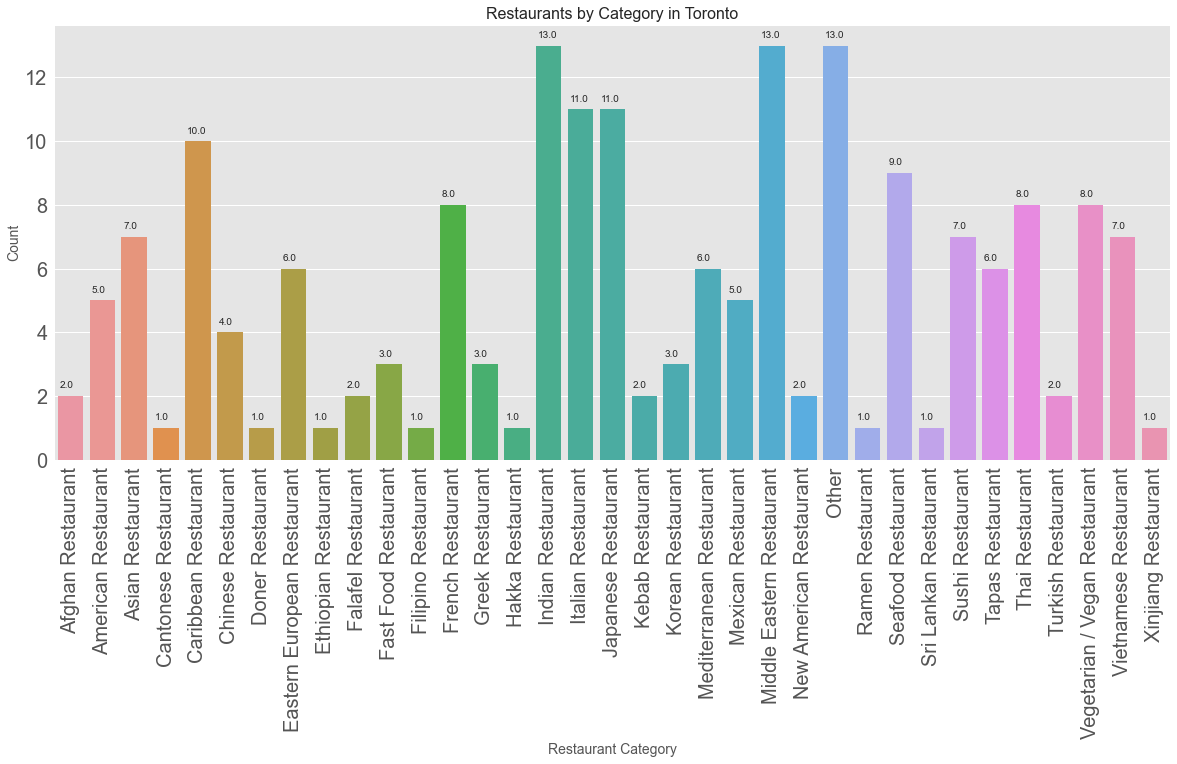

In [338]:
import matplotlib.patches as patches
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Category",y="Count",data = restaurants_df)
ax.set_xlabel('Restaurant Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.set_title('Restaurants by Category in Toronto',fontsize = 16) # set title and labels

ax.tick_params(labelsize=20)
plt.xticks(rotation=90)


for num in ax.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.25))

We can see that out of the valid restaurants in the dataframe, most of them fall under the "Other" category, followed by Middle Eastern and Indian restaurants. This might give us an idea about the ethnic populations that lives in those areas.      
#### Lets look at the other categories.

In [339]:
categories_df.shape

(117, 2)

We will split the chart for this dataset into two parts:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

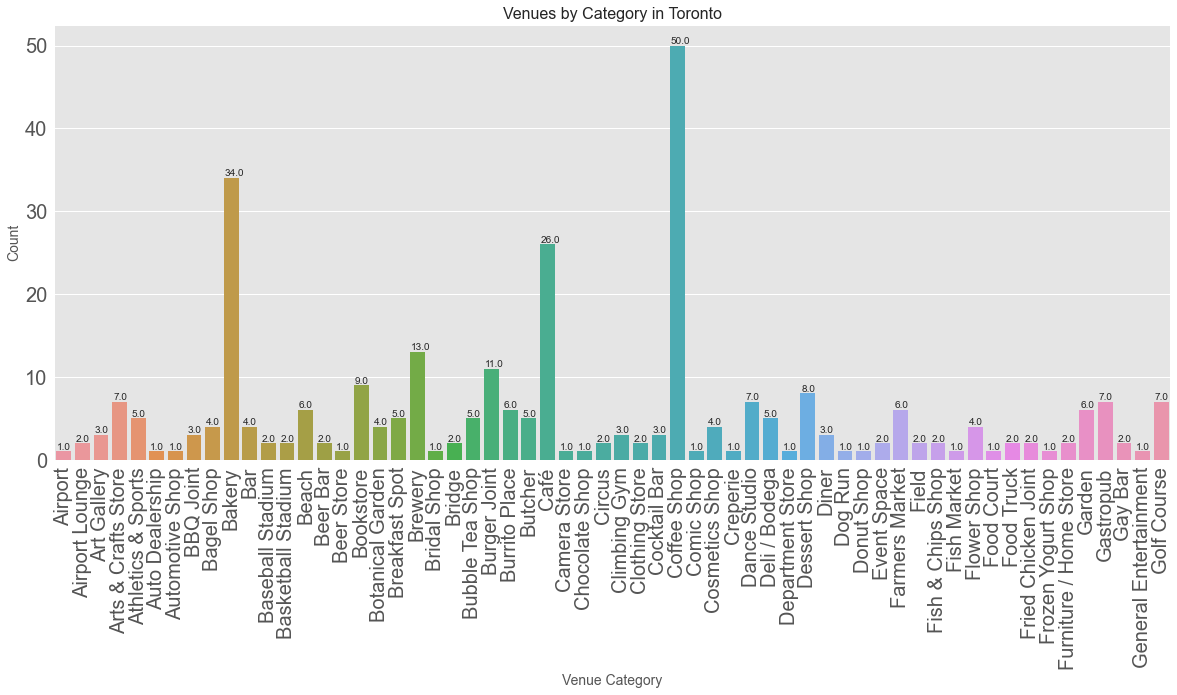

In [340]:
plt.figure(figsize = (20,8))
ax1 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[:60])
ax1.set_xlabel('Venue Category', fontsize = 14)
ax1.set_ylabel('Count', fontsize = 14)

ax1.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax1.tick_params(labelsize=20)

for num in ax1.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax1.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
    

plt.xticks(rotation=90)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

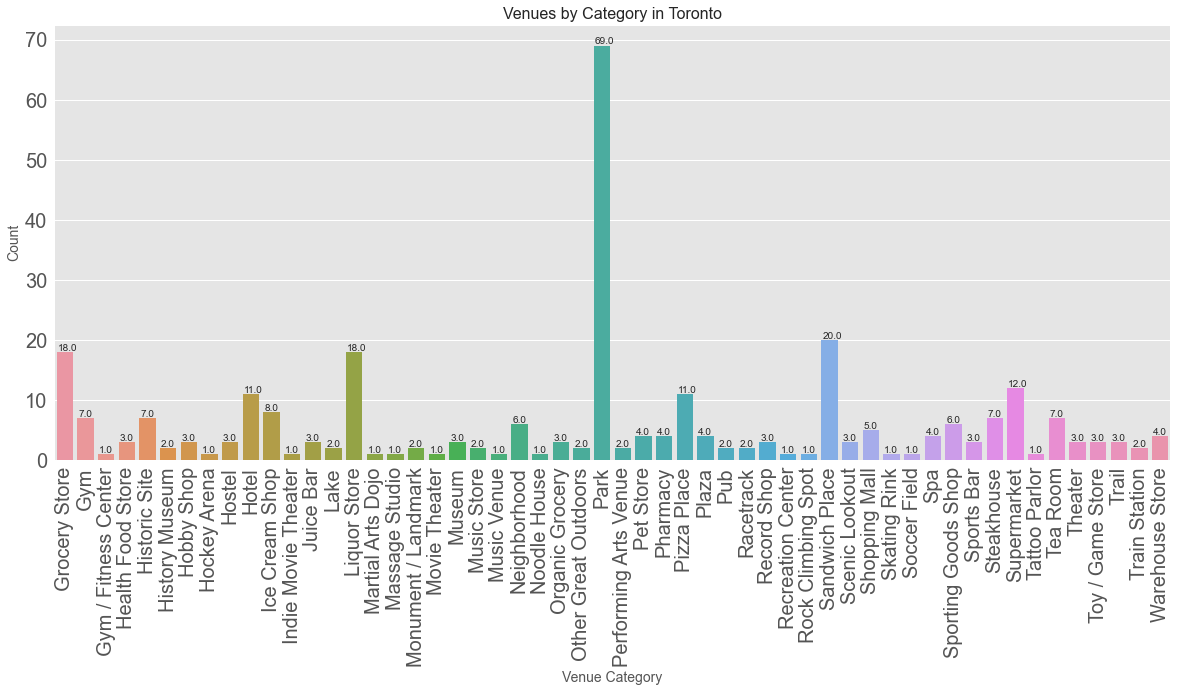

In [341]:
plt.figure(figsize = (20,8))
ax2 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[61:115],)
ax2.set_xlabel('Venue Category', fontsize = 14)
ax2.set_ylabel('Count', fontsize = 14)

ax2.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax2.tick_params(labelsize=20)

for num in ax2.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax2.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
plt.xticks(rotation=90)

#### We can see that after restaurants, parks and coffee shops are the next most populous venue types.

<h2><a id = "catbyboro"></a>Categories by Borough</h2><a href="#D1TOP">back to top of section</a>

In [342]:
cat_by_boro = []
for i in range(master_data.shape[0]):
    if "Restaurant" in master_data.iat[i,1]:
        cat_by_boro.append(["Restaurant",master_data.iat[i,5]])
    else:
        cat_by_boro.append([master_data.iat[i,1],master_data.iat[i,5]])

In [343]:
cat_by_boro = pd.DataFrame(cat_by_boro, columns = ['Category','Borough'])

In [344]:
cat_by_boro.head()

Category     Borough
0  Recreation Center  North York
1        Bridal Shop  North York
2         Restaurant  North York
3       Liquor Store  North York
4       Climbing Gym  North York

In [345]:
master_cats = pd.DataFrame(columns = cat_by_boro['Borough'].unique())

In [346]:
master_cats['Category'] = cat_by_boro.drop_duplicates(subset = ['Category'])['Category']

In [347]:
master_cats.head()

North York Central Toronto West Toronto York Downtown Toronto East Toronto  \
0        NaN             NaN          NaN  NaN              NaN          NaN   
1        NaN             NaN          NaN  NaN              NaN          NaN   
2        NaN             NaN          NaN  NaN              NaN          NaN   
3        NaN             NaN          NaN  NaN              NaN          NaN   
4        NaN             NaN          NaN  NaN              NaN          NaN   

  Etobicoke Scarborough East York Vaughan  ... Scarborough North  \
0       NaN         NaN       NaN     NaN  ...               NaN   
1       NaN         NaN       NaN     NaN  ...               NaN   
2       NaN         NaN       NaN     NaN  ...               NaN   
3       NaN         NaN       NaN     NaN  ...               NaN   
4       NaN         NaN       NaN     NaN  ...               NaN   

  Scarborough—Guildwood Scarborough Southwest Scarborough Centre  \
0                   NaN                   NaN                NaN   
1                   NaN                   NaN                NaN   
2                   NaN                   NaN                NaN   
3                   NaN                   NaN                NaN   
4                   NaN                   NaN                NaN   

  Scarborough—Rouge Park Beaches—East York Davenport Etobicoke North Brampton  \
0                    NaN               NaN       NaN             NaN      NaN   
1                    NaN               NaN       NaN             NaN      NaN   
2                    NaN               NaN       NaN             NaN      NaN   
3                    NaN               NaN       NaN             NaN      NaN   
4                    NaN               NaN       NaN             NaN      NaN   

            Category  
0  Recreation Center  
1        Bridal Shop  
2         Restaurant  
3       Liquor Store  
4       Climbing Gym  

[5 rows x 31 columns]

Gotta make a column for each borough and fill the table with the right data

In [348]:
master_cats.set_index('Category',inplace = True)

This loop will determine the number of each type in venue for each borough and populate the master_cats dataframe 

In [349]:
for col_name in master_cats: # for each column
    for row_index in master_cats.index: # for each row index
        df = pd.DataFrame(cat_by_boro[cat_by_boro['Borough']==col_name])
        count = df.groupby('Category').size()
        if row_index in count: #count the number of venues in each category for each borough
            master_cats.loc[row_index,col_name] = count[row_index]
        else:
            master_cats.loc[row_index,col_name] = 0

In [350]:
master_cats.head()

North York Central Toronto West Toronto York  \
Category                                                         
Recreation Center          1               0            0    0   
Bridal Shop                1               0            0    0   
Restaurant                21               4            6    1   
Liquor Store               2               0            0    1   
Climbing Gym               1               0            0    0   

                  Downtown Toronto East Toronto Etobicoke Scarborough  \
Category                                                                
Recreation Center                0            0         0           0   
Bridal Shop                      0            0         0           0   
Restaurant                      33            8        29          33   
Liquor Store                     6            0         5           2   
Climbing Gym                     0            0         2           0   

                  East York Vaughan  ... Scarborough—Agincourt  \
Category                             ...                         
Recreation Center         0       0  ...                     0   
Bridal Shop               0       0  ...                     0   
Restaurant                3       7  ...                     1   
Liquor Store              0       0  ...                     0   
Climbing Gym              0       0  ...                     0   

                  Scarborough North Scarborough—Guildwood  \
Category                                                    
Recreation Center                 0                     0   
Bridal Shop                       0                     0   
Restaurant                        1                     1   
Liquor Store                      0                     0   
Climbing Gym                      0                     0   

                  Scarborough Southwest Scarborough Centre  \
Category                                                     
Recreation Center                     0                  0   
Bridal Shop                           0                  0   
Restaurant                            0                  0   
Liquor Store                          0                  0   
Climbing Gym                          0                  0   

                  Scarborough—Rouge Park Beaches—East York Davenport  \
Category                                                               
Recreation Center                      0                 0         0   
Bridal Shop                            0                 0         0   
Restaurant                             0                 1         0   
Liquor Store                           0                 0         0   
Climbing Gym                           0                 0         0   

                  Etobicoke North Brampton  
Category                                    
Recreation Center               0        0  
Bridal Shop                     0        0  
Restaurant                      2        3  
Liquor Store                    0        1  
Climbing Gym                    0        0  

[5 rows x 30 columns]

Now we can try visualzing the distribution of these venues across all boroughs  
Lets look at some of the top venue categories in each borough

In [351]:
colors = ['#b5b5b5','#55a3bd','#55bd6c','#d9b362','#c39de3','#ed98df', '#4629d6','#fc8d72','#e60e2b','#087343']

Text(0, 0.5, 'Count')

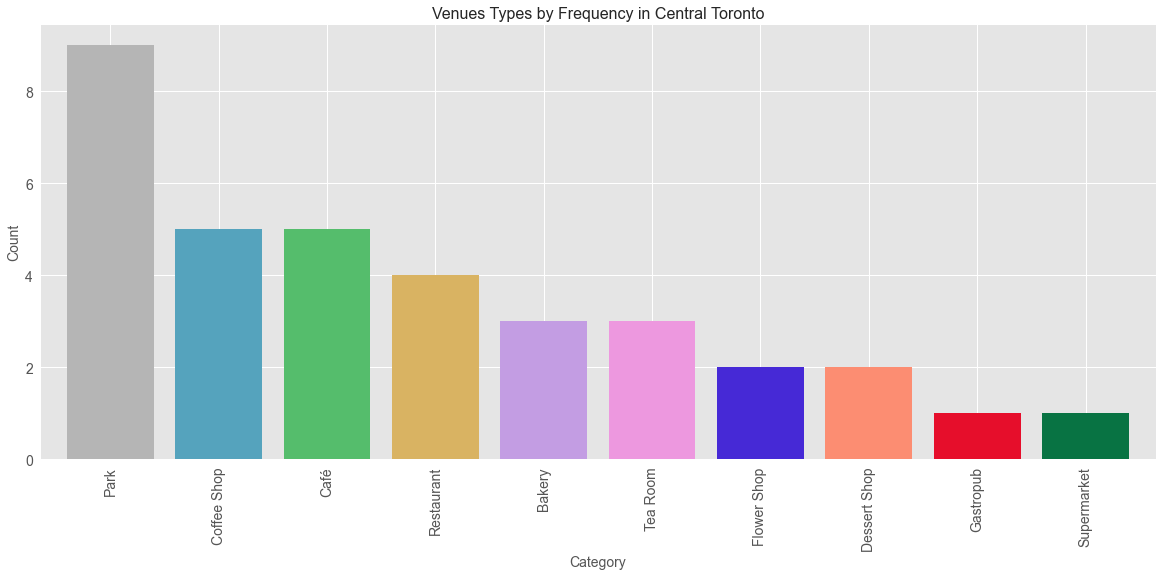

In [352]:
CT = master_cats.sort_values('Central Toronto',ascending = False)['Central Toronto'].head(10)
ax = CT.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)
ax.set_title('Venues Types by Frequency in Central Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)



Text(0, 0.5, 'Count')

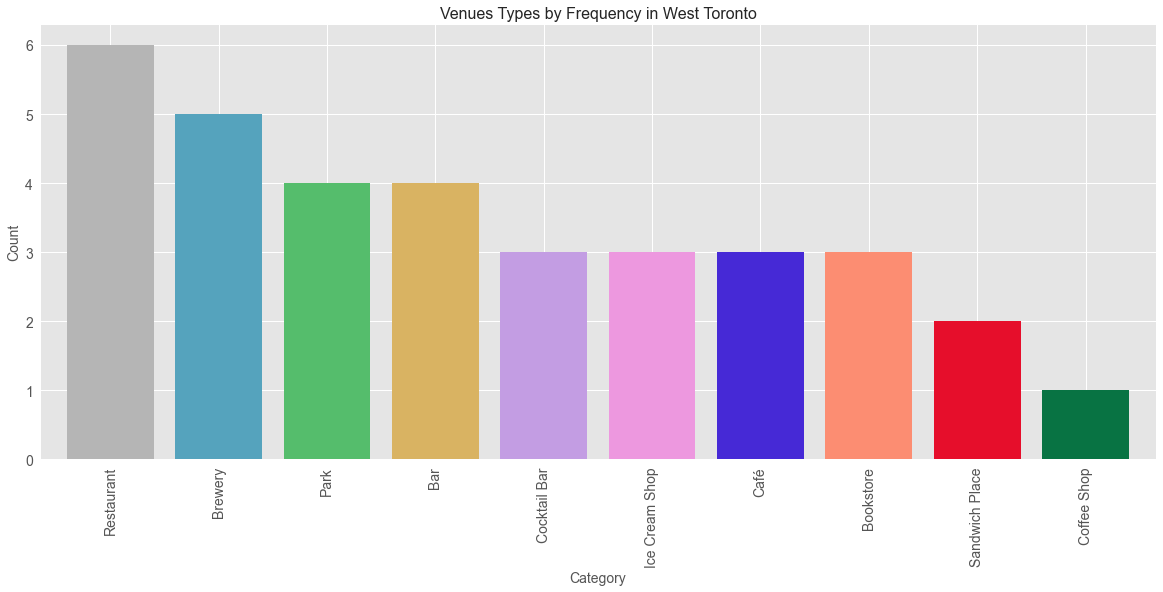

In [353]:
WT = master_cats.sort_values('West Toronto',ascending = False)['West Toronto'].head(10)
ax = WT.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in West Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

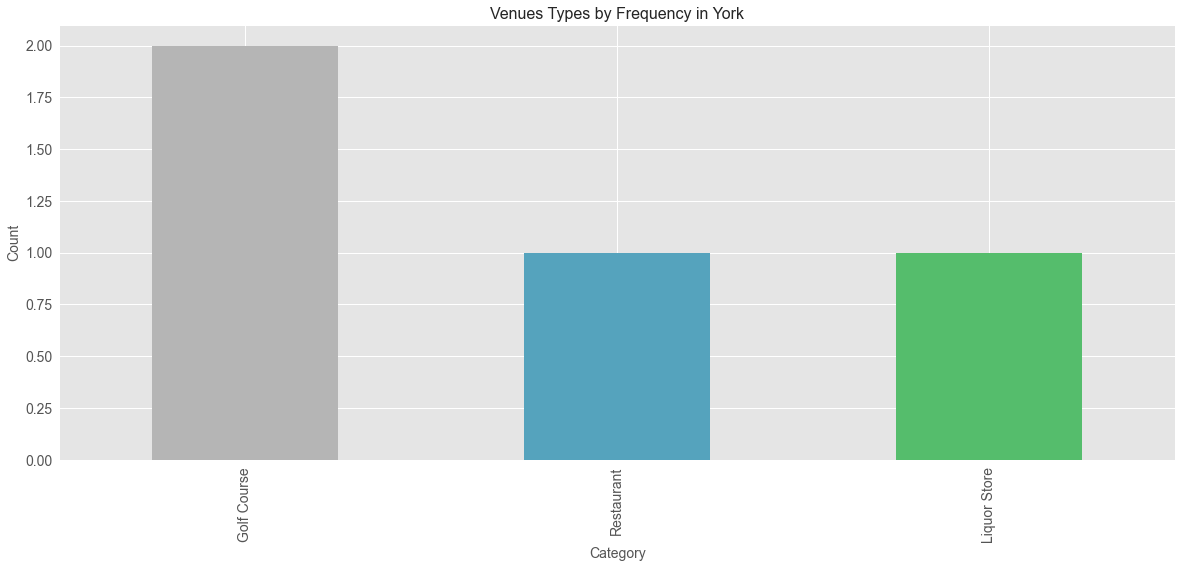

In [139]:
YO = master_cats.sort_values('York',ascending = False)['York'].head(3)
ax = YO.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.5, fontsize = 14)

ax.set_title('Venues Types by Frequency in York',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

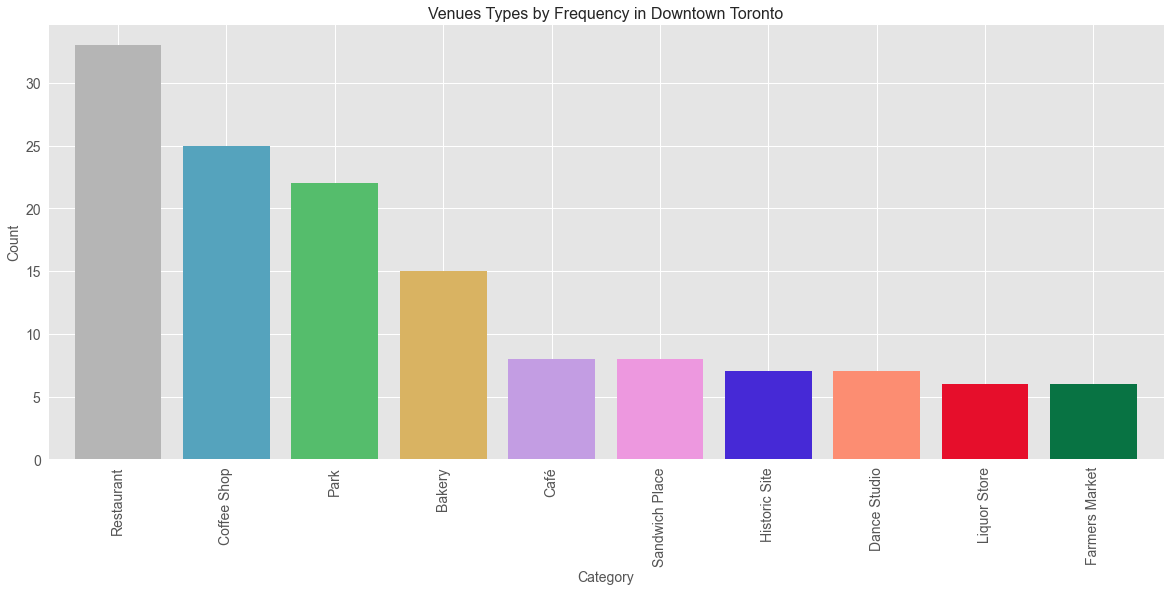

In [140]:
DT = master_cats.sort_values('Downtown Toronto',ascending = False)['Downtown Toronto'].head(10)
ax = DT.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Downtown Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

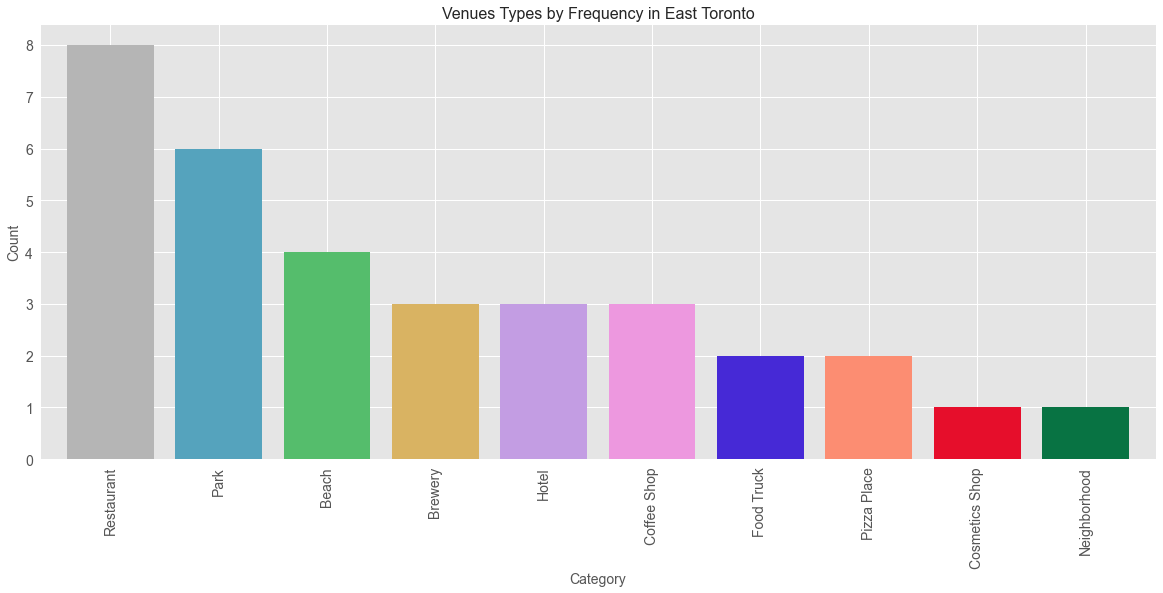

In [141]:
ET = master_cats.sort_values('East Toronto',ascending = False)['East Toronto'].head(10)
ax = ET.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in East Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

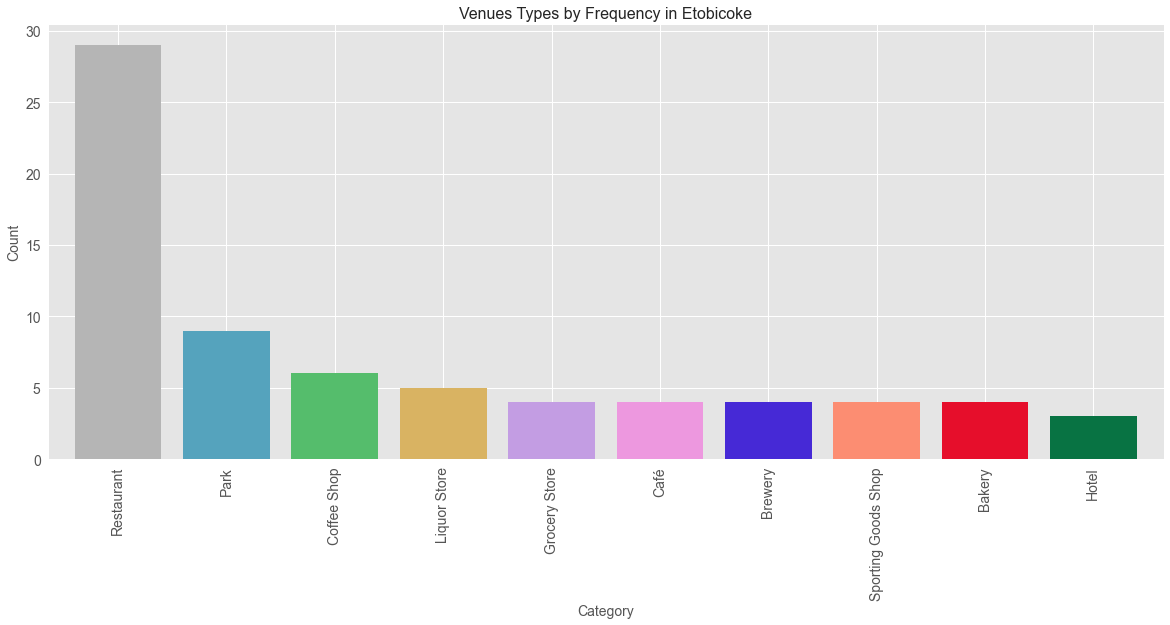

In [142]:
EB = master_cats.sort_values('Etobicoke',ascending = False)['Etobicoke'].head(10)
ax = EB.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Etobicoke',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

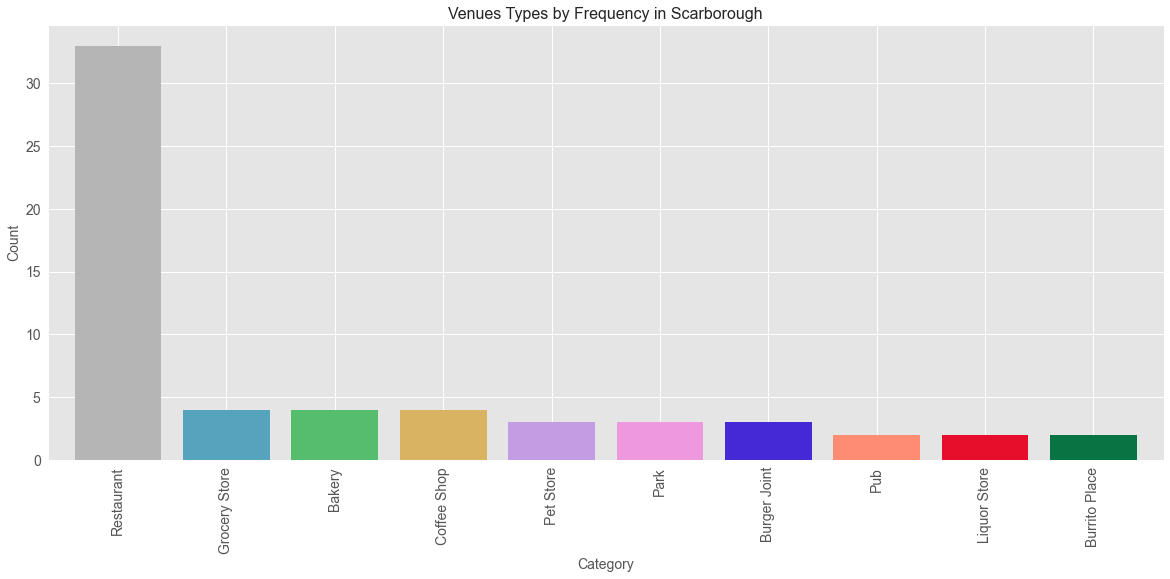

In [143]:
SB = master_cats.sort_values('Scarborough',ascending = False)['Scarborough'].head(10)
ax = SB.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Scarborough',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

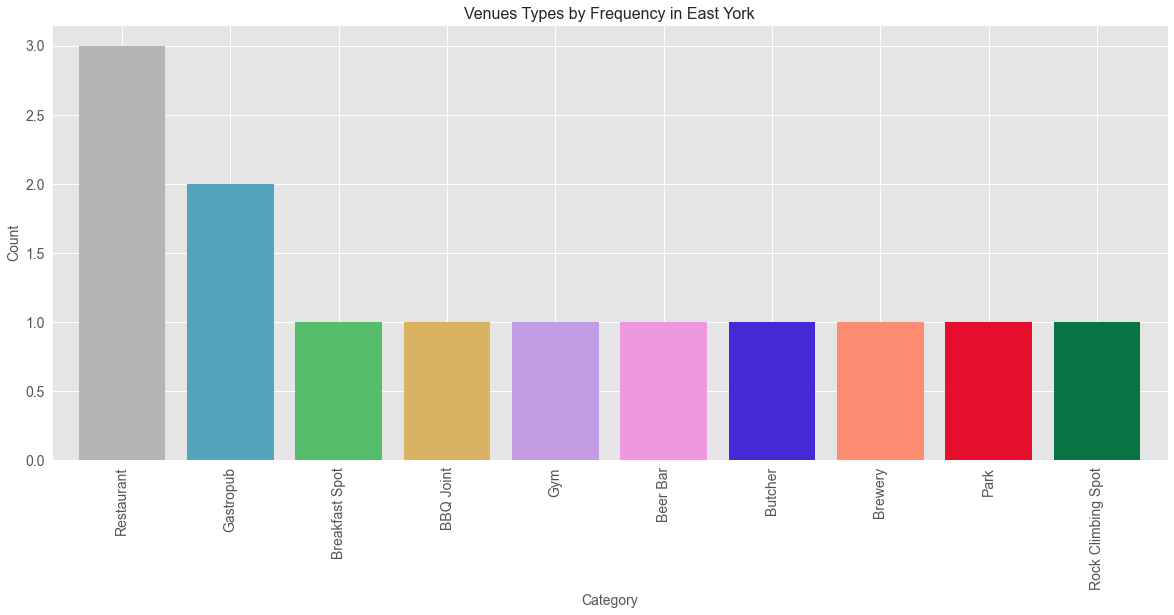

In [144]:
EY = master_cats.sort_values('East York',ascending = False)['East York'].head(10)
ax = EY.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in East York',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

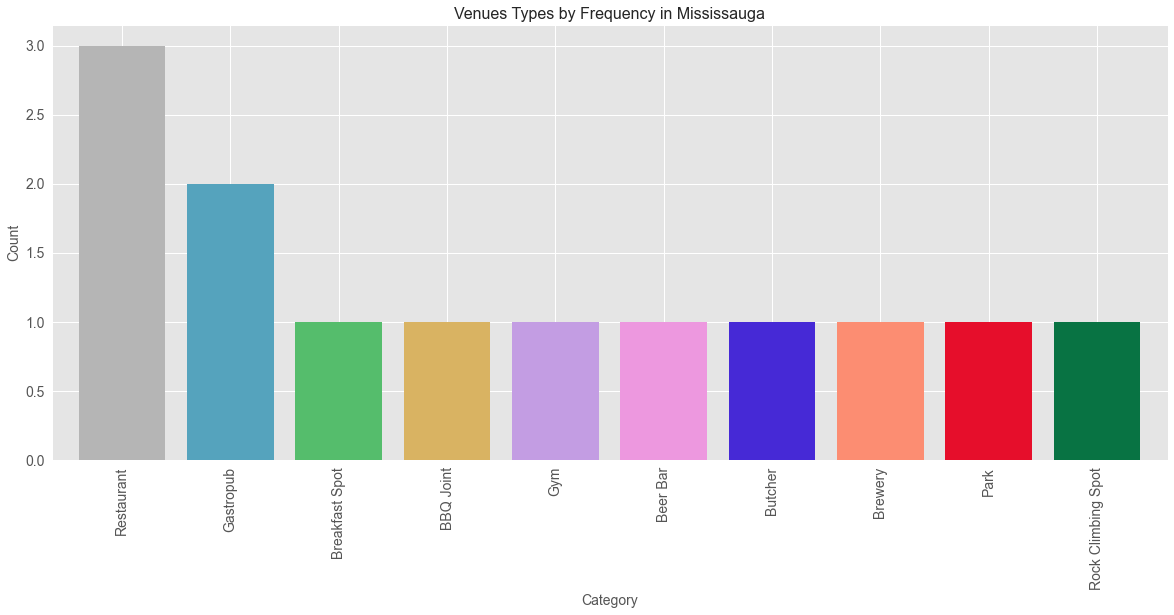

In [322]:
MI = master_cats.sort_values('Mississauga',ascending = False)['Mississauga'].head(10)
ax = EY.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Mississauga',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

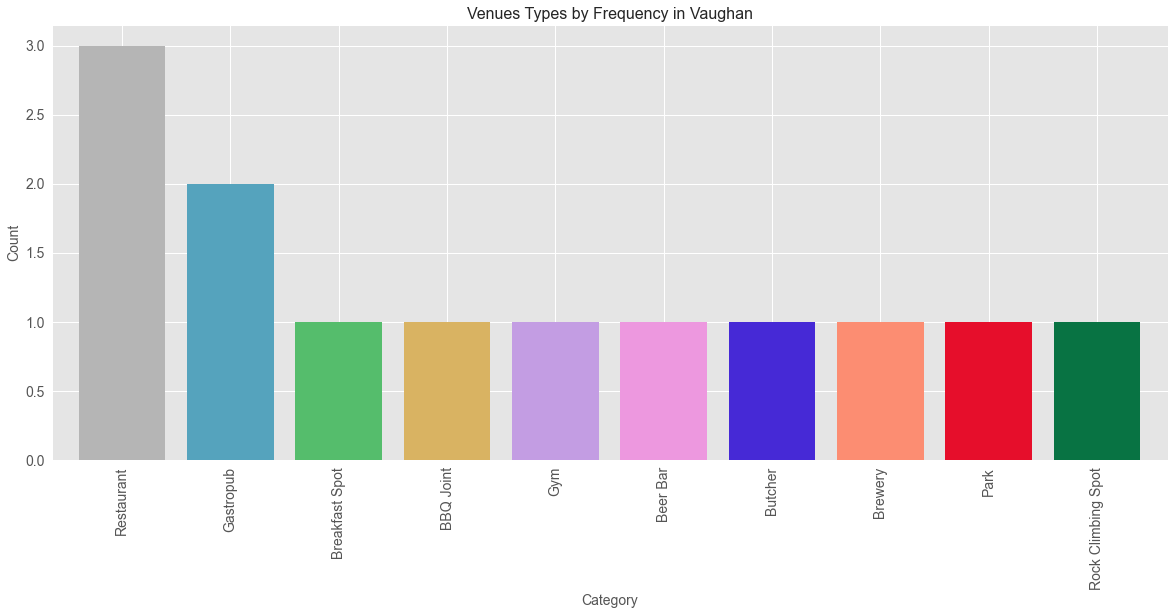

In [323]:
VA = master_cats.sort_values('Vaughan',ascending = False)['Vaughan'].head(10)
ax = EY.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Vaughan',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

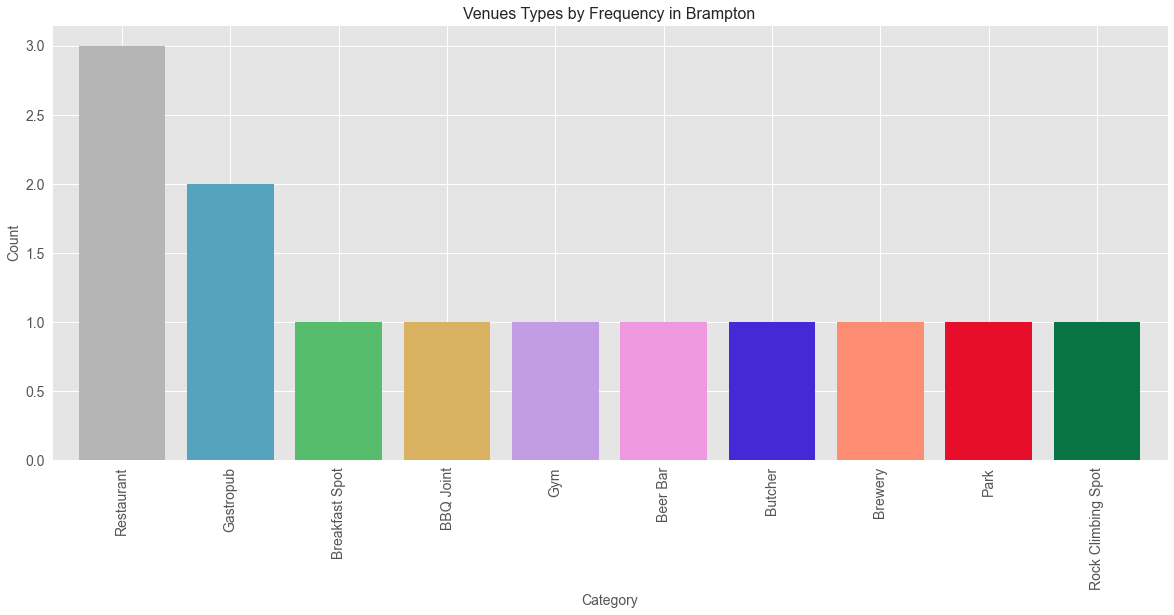

In [354]:
BR = master_cats.sort_values('Brampton',ascending = False)['Brampton'].head(10)
ax = EY.plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Frequency in Brampton',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

<h3> D.2 - In this Section: <a id = "D2TOP"></a> <a id = "clustering"></a></h3>
<a href = "#DTOP"> top of section D</a><br>  

1. <a href = "#groups">Preparing Cluster Groups</a>   <br>
2. <a href = "#kmeans">K-Means Clustering</a><br>
3. <a href = "#mapcluster">Map Clustering</a><br>

<h2> Preparing Cluster Groups <a id = "groups"></a>

Here we will cluster each group of neighbourhoods within a postal code area based on its most common venues.

<h4><a id = "onehot"></a>Before we can start clustering, we will need to apply one hot encoding to our data. </h4>

Since many of the venues in our dataframe were not assigned a neighbourhood, we need to exclude those rows for now.

In [145]:
# create dataframe with dummy values for categories
tor_onehot = pd.get_dummies( master_data.dropna(subset = ['Neighbourhood'])['categories'], prefix="", prefix_sep="")

In [146]:
tor_onehot['Neighbourhood'] = master_data.dropna(subset = ['Neighbourhood'])['Neighbourhood']

In [147]:
tor_onehot.insert(0,'Borough',master_data.dropna(subset = ['Neighbourhood'])['Borough'])

In [148]:
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

Neighbourhood     Borough  \
0                                        Downsview  North York   
1  Bathurst Manor, Wilson Heights, Downsview North  North York   
2  Bathurst Manor, Wilson Heights, Downsview North  North York   
3                                        Downsview  North York   
4                                        Downsview  North York   

   American Restaurant  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0                    0            0                    0                 0   
1                    0            0                    0                 0   
2                    0            0                    0                 0   
3                    0            0                    0                 0   
4                    0            0                    0                 0   

   Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  ...  Thai Restaurant  \
0                   0          0           0       0  ...                0   
1                   0          0           0       0  ...                0   
2                   0          0           0       0  ...                0   
3                   0          0           0       0  ...                0   
4                   0          0           0       0  ...                0   

   Theater  Toy / Game Store  Trail  Turkish Restaurant  \
0        0                 0      0                   0   
1        0                 0      0                   0   
2        0                 0      0                   0   
3        0                 0      0                   0   
4        0                 0      0                   0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Warehouse Store  \
0                              0                      0                0   
1                              0                      0                0   
2                              0                      0                0   
3                              0                      0                0   
4                              0                      0                0   

   Xinjiang Restaurant  Yoga Studio  
0                    0            0  
1                    0            0  
2                    0            0  
3                    0            0  
4                    0            0  

[5 rows x 132 columns]

In [149]:
tor_onehot.shape

(631, 132)

### Let's group the rows by neighbourhood and take the mean frequency of occurence of each venue category

In [150]:
tor_grouped = tor_onehot.groupby('Neighbourhood').mean().reset_index()
tor_grouped.head()

Neighbourhood  American Restaurant  \
0                                        Agincourt                  0.0   
1                           Alderwood, Long Branch                  0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                  0.0   
3                                  Bayview Village                  0.0   
4                Bedford Park, Lawrence Manor East                  0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0               0.1                 0.0   
1          0.0                  0.0               0.0                 0.0   
2          0.0                  0.0               0.0                 0.0   
3          0.0                  0.0               0.0                 0.0   
4          0.0                  0.0               0.0                 0.0   

   BBQ Joint  Bagel Shop    Bakery  Bar  ...  Thai Restaurant  Theater  \
0        0.0         0.0  0.100000  0.0  ...              0.0      0.0   
1        0.0         0.0  0.000000  0.0  ...              0.0      0.0   
2        0.0         0.0  0.000000  0.0  ...              0.0      0.0   
3        0.0         0.0  0.000000  0.0  ...              0.0      0.0   
4        0.0         0.0  0.333333  0.0  ...              0.0      0.0   

   Toy / Game Store  Trail  Turkish Restaurant  Vegetarian / Vegan Restaurant  \
0               0.0    0.0                 0.0                            0.0   
1               0.0    0.0                 0.0                            0.0   
2               0.0    0.0                 0.0                            0.0   
3               0.0    0.0                 0.0                            0.0   
4               0.0    0.0                 0.0                            0.0   

   Vietnamese Restaurant  Warehouse Store  Xinjiang Restaurant  Yoga Studio  
0                    0.0              0.0                  0.0          0.0  
1                    0.0              0.0                  0.0          0.0  
2                    0.0              0.0                  0.0          0.0  
3                    0.0              0.0                  0.0          0.0  
4                    0.0              0.0                  0.0          0.0  

[5 rows x 131 columns]

#### Lets analyse the top 5 most frequent venues of each neighbourhood

In [151]:
num_top_venues = 5

for boro in tor_grouped['Neighbourhood']:
    print("----"+boro+"----")
    temp = tor_grouped[tor_grouped['Neighbourhood'] == boro].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  Venue  Freq
0  Caribbean Restaurant   0.2
1  Gym / Fitness Center   0.1
2                Bakery   0.1
3           Coffee Shop   0.1
4  Cantonese Restaurant   0.1


----Alderwood, Long Branch----
                Venue  Freq
0         Pizza Place  0.17
1  Seafood Restaurant  0.17
2        Burger Joint  0.17
3       Grocery Store  0.17
4                Park  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
                      Venue  Freq
0                      Park   0.4
1  Mediterranean Restaurant   0.2
2               Supermarket   0.2
3               Bridal Shop   0.2
4       American Restaurant   0.0


----Bayview Village----
                       Venue  Freq
0               Liquor Store   1.0
1        American Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3                   Pharmacy   0.0
4                  Pet Store   0.0


----Bedford Park, Lawrence Manor East----
                 Venue  Freq
0         Gourmet Shop  0.33
1

4          Monument / Landmark  0.00


----Parkview Hill, Woodbine Gardens----
                       Venue  Freq
0         Rock Climbing Spot   1.0
1        American Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3                   Pharmacy   0.0
4                  Pet Store   0.0


----Parkwoods----
                  Venue  Freq
0  Caribbean Restaurant   0.5
1           Event Space   0.5
2   American Restaurant   0.0
3   Monument / Landmark   0.0
4              Pharmacy   0.0


----Regent Park, Harbourfront----
                      Venue  Freq
0               Coffee Shop  0.28
1                      Park  0.19
2          Botanical Garden  0.06
3  Mediterranean Restaurant  0.06
4            Farmers Market  0.06


----Richmond, Adelaide, King----
                 Venue  Freq
0                 Park  0.38
1      Thai Restaurant  0.38
2                Plaza  0.25
3         Neighborhood  0.00
4  Monument / Landmark  0.00


----Rosedale----
            Venue  Freq
0    Gourmet Shop  

We need to store this information in a dataframe. First we need a function to sort the venues from most common to least common

In [152]:
def get_sorted_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [153]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in range(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tor_venues_sorted = pd.DataFrame(columns=columns)
tor_venues_sorted['Neighbourhood'] = tor_grouped['Neighbourhood']

for ind in range(tor_grouped.shape[0]):
    tor_venues_sorted.iloc[ind, 1:] = get_sorted_venues(tor_grouped.iloc[ind, :], num_top_venues)


In [154]:
tor_venues_sorted.head()

Neighbourhood 1st Most Common Venue  \
0                                        Agincourt  Caribbean Restaurant   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North                  Park   
3                                  Bayview Village          Liquor Store   
4                Bedford Park, Lawrence Manor East                Bakery   

  2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
0  Cantonese Restaurant  Gym / Fitness Center               Coffee Shop   
1          Burger Joint                  Park                      Café   
2           Bridal Shop           Supermarket  Mediterranean Restaurant   
3           Yoga Studio   Filipino Restaurant            Cosmetics Shop   
4          Gourmet Shop                  Café          Doner Restaurant   

  5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
0      Asian Restaurant               Breakfast Spot   Sporting Goods Shop   
1    Seafood Restaurant                Grocery Store             BBQ Joint   
2           Yoga Studio  Eastern European Restaurant    Falafel Restaurant   
3              Creperie                 Dance Studio      Department Store   
4        Farmers Market           Falafel Restaurant           Event Space   

  8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0                Bakery        Sri Lankan Restaurant            Yoga Studio  
1           Art Gallery                     Creperie           Dance Studio  
2           Event Space         Ethiopian Restaurant                  Diner  
3          Dessert Shop                        Diner       Doner Restaurant  
4  Ethiopian Restaurant  Eastern European Restaurant            Yoga Studio

<h2><a id = "kmeans"></a> K-Means Clustering</h2> <a href = "#D2TOP">back to top of section</a>

In [278]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

First we will set a cluster number of 5, then we will use the elbow visualizer to determine if 5 is really the optimal number of clusters or not

In [279]:
# set number of clusters
kclusters = 5
tor_clustering = tor_grouped.drop('Neighbourhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 4, 1, 1, 1, 3, 1, 0])

In [280]:
kmeans.labels_

array([1, 3, 3, 4, 1, 1, 1, 3, 1, 0, 0, 3, 0, 1, 3, 2, 1, 0, 3, 0, 1, 3,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3,
       1, 0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 3,
       1, 0, 1, 0, 4, 1, 0, 0, 1, 3, 1])

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


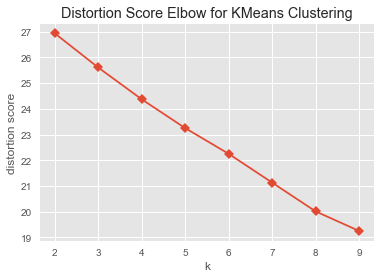

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x17393210>,
                 k=None, model=None, timings=False)

In [281]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), tor_clustering, k=(2,10), timings = False)


#### Our k-means clustering visualizer does not show any 'elbow' location that indicate the optimal number of clusters, so we will keep 5 clusters for now.

In [282]:
# set number of clusters
kclusters = 5

tor_clustering = tor_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 3, 4, 1, 1, 1, 3, 1, 0, 0, 3, 0, 1, 3, 2, 1, 0, 3, 0, 1, 3,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3,
       1, 0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 3,
       1, 0, 1, 0, 4, 1, 0, 0, 1, 3, 1])

Now we need to merge the cluster labels into a dataframe and add the latitude and logitude coordinates


In [283]:
# add clustering labels

tor_venues_sorted.drop('Cluster Labels', 1,inplace=True)
tor_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    
tor_merged = pd.DataFrame(master_data.drop(['name','categories','lat','lng','postalCode'],1))

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
tor_merged.drop_duplicates(subset = ['Neighbourhood'],inplace=True)

In [284]:
tor_merged.dropna(inplace = True)
reset_index_(tor_merged,"")

In [285]:
tor_merged['Cluster Labels']= tor_merged['Cluster Labels'].astype(int)

Now each neighbourhood is assigned a cluster label. We can visualize these clusters on a map.

In [286]:
tor_merged

Borough                                      Neighbourhood  \
0     North York                                          Downsview   
1     North York    Bathurst Manor, Wilson Heights, Downsview North   
2     North York                   Lawrence Manor, Lawrence Heights   
3     North York                        Willowdale, Willowdale East   
4     North York                  Bedford Park, Lawrence Manor East   
..           ...                                                ...   
72  West Toronto                      High Park, The Junction South   
73  West Toronto                       Dufferin, Dovercourt Village   
74  West Toronto       Brockton, Parkdale Village, Exhibition Place   
75          York                                             Weston   
76     Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   

    Neigh Lat  Neigh Lon  Cluster Labels 1st Most Common Venue  \
0   43.749299 -79.462248               1                  Park   
1   43.763893 -79.456367               3                  Park   
2   43.722079 -79.437507               1              Pharmacy   
3   43.761510 -79.410923               0         Grocery Store   
4   43.737388 -79.410925               1                Bakery   
..        ...        ...             ...                   ...   
72  43.653867 -79.466864               0                   Bar   
73  43.660202 -79.435719               3                   Bar   
74  43.650917 -79.440022               3                  Park   
75  43.700161 -79.516247               4          Liquor Store   
76  43.816178 -79.314538               1  Caribbean Restaurant   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
0     Athletics & Sports     Recreation Center                Steakhouse   
1            Bridal Shop           Supermarket  Mediterranean Restaurant   
2         Clothing Store         Shopping Mall            Chocolate Shop   
3       Sushi Restaurant      Ramen Restaurant                     Hotel   
4           Gourmet Shop                  Café          Doner Restaurant   
..                   ...                   ...                       ...   
72                  Café         Grocery Store               Coffee Shop   
73           Music Store              Beer Bar                      Café   
74           Music Venue         Movie Theater               Yoga Studio   
75           Yoga Studio   Filipino Restaurant            Cosmetics Shop   
76           Yoga Studio   Filipino Restaurant            Cosmetics Shop   

     5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
0             Hockey Arena                 Liquor Store             Racetrack   
1              Yoga Studio  Eastern European Restaurant    Falafel Restaurant   
2   Furniture / Home Store                        Diner           Event Space   
3      Japanese Restaurant                     Creperie       Bubble Tea Shop   
4           Farmers Market           Falafel Restaurant           Event Space   
..                     ...                          ...                   ...   
72             Golf Course        General Entertainment        Cosmetics Shop   
73                 Brewery                         Park          Dessert Shop   
74          Farmers Market               Cosmetics Shop              Creperie   
75                Creperie                 Dance Studio      Department Store   
76                Creperie                 Dance Studio      Department Store   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0           Climbing Gym        Vietnamese Restaurant        Warehouse Store  
1            Event Space         Ethiopian Restaurant                  Diner  
2   Ethiopian Restaurant  Eastern European Restaurant       Doner Restaurant  
3        Thai Restaurant           Seafood Restaurant             Steakhouse  
4   Ethiopian Restaurant  Eastern European Restaurant            Yoga Studio  
.. 

<h2><a id = "mapcluster"></a> Map Clustering</h2> <a href = "#D2TOP">back to top of section</a>

Now we can cluster the neighbourhoods based on their most common venues.

In [287]:
# create map
map_clusters = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [cols.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = ['#bf1b33', '#4629d6','#fc8d72','#25a135','#4496e3', '#ffeb91','#ffeb91']
for lat, lon, poi, cluster in zip(tor_merged['Neigh Lat'], tor_merged['Neigh Lon'], tor_merged['Neighbourhood'], tor_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhood: ' + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=markers_colors[round(cluster)],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=1).add_to(map_clusters)

       
for lat, lon, name in zip(coords_df['Lat'], coords_df['Lon'], coords_df['Borough']):
    label = folium.Popup('Borough: ' + name, parse_html=True)
    folium.CircleMarker(
        
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.4).add_to(map_clusters)
    

    
map_clusters


<h2>E. Results and Discussion <a id = 'Results'></a></h2>   <a id = "ETOP"></a>
<a href = "#TOC">table of contents</a>

<h3>E.1 - <a href = "#E1TOP">Examining Clusters</a> <br>
E.2 - <a href = "#E2TOP">Discussion</a></h3>

<h2><a id = "E1TOP"></a> E.1 - Examining the Clusters</h2> 

Now we can examine each cluster to determine the defining categories.

#### Cluster 0

In [288]:
tor_merged[tor_merged['Cluster Labels'] == 0].head(10)

Borough                                      Neighbourhood  \
3         North York                        Willowdale, Willowdale East   
10        North York                            Willowdale, Newtonbrook   
11   Central Toronto                                           Roselawn   
13   Central Toronto                                   Davisville North   
17              York                                 Humewood-Cedarvale   
20  Downtown Toronto                                 Central Bay Street   
21  Downtown Toronto                                     St. James Town   
27  Downtown Toronto                          Regent Park, Harbourfront   
28  Downtown Toronto  Harbourfront East, Union Station, Toronto Islands   
29  Downtown Toronto                               Church and Wellesley   

    Neigh Lat  Neigh Lon  Cluster Labels 1st Most Common Venue  \
3   43.761510 -79.410923               0         Grocery Store   
10  43.761510 -79.410923               0           Coffee Shop   
11  43.699456 -79.454616               0                  Café   
13  43.697936 -79.397291               0                  Café   
17  43.685721 -79.425116               0           Coffee Shop   
20  43.656119 -79.384670               0           Coffee Shop   
21  43.669403 -79.372704               0           Coffee Shop   
27  43.660706 -79.360457               0           Coffee Shop   
28  43.640080 -79.380150               0                 Hotel   
29  43.665524 -79.383801               0          Dance Studio   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
3       Sushi Restaurant       Ramen Restaurant                 Hotel   
10       Thai Restaurant         Farmers Market    Falafel Restaurant   
11           Coffee Shop                  Trail             Gastropub   
13           Coffee Shop                 Bakery    Italian Restaurant   
17     Indian Restaurant   Fast Food Restaurant        Farmers Market   
20          Neighborhood         Sandwich Place        Farmers Market   
21   Japanese Restaurant             Restaurant      Doner Restaurant   
27                  Park     Athletics & Sports        Farmers Market   
28    Basketball Stadium  Performing Arts Venue                  Park   
29           Coffee Shop             Steakhouse       Bubble Tea Shop   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
3    Japanese Restaurant              Creperie              Bubble Tea Shop   
10           Event Space  Ethiopian Restaurant  Eastern European Restaurant   
11           Yoga Studio    Falafel Restaurant                  Event Space   
13              Tea Room                  Park                  Supermarket   
17    Falafel Restaurant           Event Space         Ethiopian Restaurant   
20    Falafel Restaurant           Event Space         Ethiopian Restaurant   
21        Farmers Market    Falafel Restaurant                  Event Space   
27         Historic Site                Bakery                        Diner   
28   Japanese Restaurant          Neighborhood                  Event Space   
29               Gay Bar           Yoga Studio  Eastern European Restaurant   

          8th Most Common Venue        9th Most Common Venue  \
3               Thai Restaurant           Seafood Restaurant   
10             Doner Restaurant                        Diner   
11         Ethiopian Restaurant  Eastern European Restaurant   
13                 Dance Studio             Department Store   
17  Eastern European Restaurant                  Yoga Studio   
20  Eastern European Restaurant             Doner Restaurant   
21         Ethiopian Restaurant  Eastern European Restaurant   
27     Mediterranean Restaurant             Botanical Garden   
28         Ethiopian Restaurant  Eastern European Restaurant   
29           Falafel Restaurant                  Event Space   

   10th Most Common Venue  
3              Steakhouse  
10    Filipino Restaurant

There were many neighbourhoods assigned to cluster 0. In these neighbourhoods, the first two most common venues are dominated by Coffee Shops and Cafés. We can assume that this cluster is defined by Coffee Shops and Cafés. However, we can also see many ethnic restaurants as common venue types.

#### Cluster 1

In [289]:
tor_merged[tor_merged['Cluster Labels'] == 1].head(10)

Borough                             Neighbourhood  Neigh Lat  \
0        North York                                 Downsview  43.749299   
2        North York          Lawrence Manor, Lawrence Heights  43.722079   
4        North York         Bedford Park, Lawrence Manor East  43.737388   
5        North York                           York Mills West  43.744039   
6        North York               Willowdale, Willowdale West  43.761510   
7   Central Toronto                             Lawrence Park  43.729199   
8        North York           Northwood Park, York University  43.754135   
12       North York  North Park, Maple Leaf Park, Upwood Park  43.718690   
14     West Toronto                  Little Portugal, Trinity  43.647413   
15  Central Toronto                                Davisville  43.697936   

    Neigh Lon  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  -79.462248               1                  Park    Athletics & Sports   
2  -79.437507               1              Pharmacy        Clothing Store   
4  -79.410925               1                Bakery          Gourmet Shop   
5  -79.406657               1     French Restaurant           Yoga Studio   
6  -79.410923               1      Doner Restaurant             Bookstore   
7  -79.403252               1           Flower Shop        Sandwich Place   
8  -79.504480               1       Thai Restaurant           Music Store   
12 -79.477534               1                Bakery      Doner Restaurant   
14 -79.431116               1               Brewery          Cocktail Bar   
15 -79.397291               1          Dessert Shop    Italian Restaurant   

    3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0       Recreation Center            Steakhouse            Hockey Arena   
2           Shopping Mall        Chocolate Shop  Furniture / Home Store   
4                    Café      Doner Restaurant          Farmers Market   
5     Filipino Restaurant        Cosmetics Shop                Creperie   
6   Vietnamese Restaurant            Bagel Shop             Yoga Studio   
7                  Garden                Bakery                Tea Room   
8      Italian Restaurant           Supermarket          Massage Studio   
12   Fast Food Restaurant        Farmers Market      Falafel Restaurant   
14         Ice Cream Shop             Bookstore        Tapas Restaurant   
15            Yoga Studio   Filipino Restaurant          Cosmetics Shop   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
0           Liquor Store             Racetrack                 Climbing Gym   
2                  Diner           Event Space         Ethiopian Restaurant   
4     Falafel Restaurant           Event Space         Ethiopian Restaurant   
5           Dance Studio      Department Store                 Dessert Shop   
6         Farmers Market    Falafel Restaurant                  Event Space   
7            Yoga Studio      Doner Restaurant           Falafel Restaurant   
8            Pizza Place          Dance Studio             Department Store   
12           Event Space  Ethiopian Restaurant  Eastern European Restaurant   
14        Sandwich Place   Japanese Restaurant                   Beer Store   
15              Creperie          Dance Studio             Department Store   

          9th Most Common Venue       10th Most Common Venue  
0         Vietnamese Restaurant              Warehouse Store  
2   Eastern European Restaurant             Doner Restaurant  
4   Eastern European Restaurant                  Yoga Studio  
5                         Diner             Doner Restaurant  
6          Ethiopian Restaurant  Eastern European Restaurant  
7                   Event Space         Ethiopian Restaurant  
8                  Dessert Shop                     Creperie  
12                  Yoga Studio            Fish & Chips Shop  
14                  Pizza Place          Fried Chicken Joint  
1

This cluster is a bit harder to determine the defining categories since its so diverse. Looking at the first two common venues of these neighbourhoods, again we see a lot of Restaurants and eateries.In the last few columns, we can see that Ethiopian restaurants and Eastern European restaurants were fairly common. 

#### Cluster 2

In [290]:
tor_merged[tor_merged['Cluster Labels'] == 2].head(10)

Borough                   Neighbourhood  Neigh Lat  Neigh Lon  \
30  Downtown Toronto  Commerce Court, Victoria Hotel  43.648095 -79.379025   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
30               2                   Gym           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
30        Cosmetics Shop              Creperie          Dance Studio   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
30      Department Store          Dessert Shop                 Diner   

   9th Most Common Venue       10th Most Common Venue  
30      Doner Restaurant  Eastern European Restaurant

There is only one neighbourhood in this cluster. We can assume it is defined by its 1st most common venue: Gym locations.

#### Cluster 3

In [291]:
tor_merged[tor_merged['Cluster Labels'] == 3].head(10)

Borough                                    Neighbourhood  \
1         North York  Bathurst Manor, Wilson Heights, Downsview North   
16        North York                                        Don Mills   
22  Downtown Toronto                         Richmond, Adelaide, King   
32   Central Toronto              The Annex, North Midtown, Yorkville   
34      East Toronto                     The Danforth West, Riverdale   
35  Downtown Toronto                                         Christie   
41         Etobicoke                           Alderwood, Long Branch   
42         Etobicoke          Islington Avenue, Humber Valley Village   
45         Etobicoke     New Toronto, Mimico South, Humber Bay Shores   
48      West Toronto                           Parkdale, Roncesvalles   

    Neigh Lat  Neigh Lon  Cluster Labels 1st Most Common Venue  \
1   43.763893 -79.456367               3                  Park   
16  43.775347 -79.345944               3                  Café   
22  43.648587 -79.391373               3                  Park   
32  43.670338 -79.407117               3                  Park   
34  43.686433 -79.300355               3                  Park   
35  43.664111 -79.418405               3                  Café   
41  43.601717 -79.545232               3           Pizza Place   
42  43.679484 -79.538909               3                Garden   
45  43.600763 -79.505264               3                  Park   
48  43.640292 -79.437299               3                  Park   

   2nd Most Common Venue        3rd Most Common Venue  \
1            Bridal Shop                  Supermarket   
16                  Park                Shopping Mall   
22       Thai Restaurant                        Plaza   
32           Yoga Studio                  Coffee Shop   
34      Greek Restaurant                       Bakery   
35     Health Food Store                         Park   
41          Burger Joint                         Park   
42                  Café             Doner Restaurant   
45          Liquor Store           Mexican Restaurant   
48        Scenic Lookout  Eastern European Restaurant   

       4th Most Common Venue 5th Most Common Venue  \
1   Mediterranean Restaurant           Yoga Studio   
16          Botanical Garden        Farmers Market   
22               Yoga Studio          Dessert Shop   
32            Cosmetics Shop              Creperie   
34            Cosmetics Shop                  Café   
35             Grocery Store           Event Space   
41                      Café    Seafood Restaurant   
42            Farmers Market    Falafel Restaurant   
45        Italian Restaurant        Ice Cream Shop   
48               Yoga Studio  Fast Food Restaurant   

          6th Most Common Venue 7th Most Common Venue  \
1   Eastern European Restaurant    Falafel Restaurant   
16           Falafel Restaurant           Event Space   
22                  Event Space  Ethiopian Restaurant   
32                 Dance Studio      Department Store   
34                    Bookstore    Italian Restaurant   
35             Doner Restaurant    Falafel Restaurant   
41                Grocery Store             BBQ Joint   
42                  Event Space  Ethiopian Restaurant   
45             Sushi Restaurant     Indian Restaurant   
48               Cosmetics Shop              Creperie   

          8th Most Common Venue        9th Most Common Venue  \
1                   Event Space         Ethiopian Restaurant   
16         Ethiopian Restaurant  Eastern European Restaurant   
22  Eastern European Restaurant             Doner Restaurant   
32                 Dessert Shop                        Diner   
34             Tapas Restaurant                  Pizza Place   
35         Ethiopian Restaurant  Eastern European Restaurant   
41                  Art Gallery                     Creperie   
42  Eastern European Restaurant                  Yoga Studio   
45                         Café                 Skating

These neighbourhoods were assigned cluster 3. Their most common venues are mostly Park locations, so we can assume that's the defining characteristic for this cluster.

#### Cluster 4

In [292]:
tor_merged[tor_merged['Cluster Labels'] == 4].head(10)

Borough    Neighbourhood  Neigh Lat  Neigh Lon  Cluster Labels  \
9   North York  Bayview Village  43.769197 -79.376662               4   
75        York           Weston  43.700161 -79.516247               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
9           Liquor Store           Yoga Studio   Filipino Restaurant   
75          Liquor Store           Yoga Studio   Filipino Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9         Cosmetics Shop              Creperie          Dance Studio   
75        Cosmetics Shop              Creperie          Dance Studio   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
9       Department Store          Dessert Shop                 Diner   
75      Department Store          Dessert Shop                 Diner   

   10th Most Common Venue  
9        Doner Restaurant  
75       Doner Restaurant

Finally, the neighbourhoods in this cluster share the same common venues. We can assume this cluster is defined by Liquor Stores. 

<h2>E.2 - <a id = "E2TOP"></a>Discussion</h2>
<a href = "#ETOP">top of section E</a>

From the data we've collected and analysed so far, it is clear that the venues in Toronto's neighbourhoods are dominated by restaurant chains of a variety of ethic backgrounds.

Neighbourhoods in cluster 0 are mostly centred around the Downtown/Central Toronto area, while some are spread out across the city. It seems that many cafés and ethnic restaurant chains choose to open in the downtown area.    
  
Neighbourhoods in cluster 1 are spread out across the city. Aside from restaurants, the common venues in these areas include Yoga studios and athletic recreation centres. It was difficult to determine a single defining feature for that cluster.

Neighbourhoods in cluster 3 have an interesting spread. The most common venues in these areas are Park locations, so they must have a lot of green spaces. These neighbourhoods are mostly situated to the southern side of the city closer to the waterfront, and less in the northern areas near York and North York.

Clusters 2 and 4 have very few neighbourhoods assigned to them, so there is not enough information to make a thorough analysis from them.

### Lets take a look back at our choropleth maps.

As we saw before, many residents of foreign ethnic origin resided in the Downtown Toronto area. It makes sense that this area is densely populated with ethnic restaurant chains. 

In [169]:
tor_ethnic_map

Looking at the age groups map, there is no clear relationship between the distribution of these age groups and the clustered neighbourhoods. 

In [170]:
tor_age_map

<h2> F. Conclusions <a id = "Conclusion"></a></h2> 
<a href = "#TOC">table of contents</a>

Now that we've analyzed the spread of all these different venues across the city, we now have an idea of what type of business tend to open up in each area of the city. This information will be useful for stakeholders such as busniess owners and startup companies to decide where they should open a branch.

For example, a restaurant company can see that most of the restaurant chains are centered around Downtown Toronto. These restaurants are all of different ethnic cuisines and are in a highly competitive area, so it is upto that company to decide whether they would like to join the competition, or open up in an area with less competition.

Another example, we can see where the neighbourhoods that have lots of parks and greenspaces are located. In the locations closer to Downtown Toronto, we see a large population of youth and young adults. This could be an ideal location to open an outdoor recreational business targeting this age group.

These are only some of the many possibilities that are available to new entrepreneurs and small businesses. The purpose of this analysis was to examine the spread of different venue types across the city and then cluster neighbourhoods together based on the most common venue in that area. The results of this project should be able to guide viewers and stakeholders to find the most profitable locations to open a certain type of business.